# Finetuning of the pretrained Japanese BERT model

Finetune the pretrained model to solve multi-class classification problems.  
This notebook requires the following objects:
- trained sentencepiece model (model and vocab files)
- pretrained Japanese BERT model

Dataset is livedoor ニュースコーパス in https://www.rondhuit.com/download.html.  
I make train:dev = 8:2 datasets.

In [1]:
import configparser
import glob
import os
import pandas as pd
import subprocess
import sys
import tarfile 
from urllib.request import urlretrieve

CURDIR = os.getcwd()
CONFIGPATH = os.path.join(CURDIR, os.pardir, 'config.ini')
config = configparser.ConfigParser()
config.read(CONFIGPATH)
print("Done reading config")

Done reading config


## Finetune pre-trained model

It will take a lot of hours to execute the following cells on CPU environment.  
You can also use colab to recieve the power of TPU. You need to uplode the created data onto your GCS bucket.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zZH2GWe0U-7GjJ2w2duodFfEUptvHjcx)

In [2]:
PRETRAINED_MODEL_PATH = '../model/model.ckpt-1400000'
FINETUNE_OUTPUT_DIR = '../model/livedoor_output'

In [ ]:
%%time
# It will take many hours on CPU environment.

!python3 ../src/run_classifier.py \
  --task_name=livedoor \
  --do_train=true \
  --do_eval=true \
  --data_dir=../data/livedoor \
  --model_file=../model/wiki-ja.model \
  --vocab_file=../model/wiki-ja.vocab \
  --init_checkpoint={PRETRAINED_MODEL_PATH} \
  --max_seq_length=512 \
  --train_batch_size=4 \
  --learning_rate=2e-5 \
  --num_train_epochs=10 \
  --output_dir={FINETUNE_OUTPUT_DIR}

W1009 15:47:50.482358 140644885206784 deprecation_wrapper.py:119] From /data2/m-taketani/practice/text_classification/sentencepiece/bert-japanese/src/optimization.py:87: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1009 15:47:50.483386 140644885206784 deprecation_wrapper.py:119] From ../src/run_classifier.py:854: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W1009 15:47:50.483909 140644885206784 deprecation_wrapper.py:119] From ../src/run_classifier.py:659: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W1009 15:47:50.484049 140644885206784 deprecation_wrapper.py:119] From ../src/run_classifier.py:659: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

W1009 15:47:50.484436 140644885206784 deprecation_wrapper.py:119] From /data2/m-taketani/practice/text_classification/sentencepiece/bert-japanese/src/modeling.py:92:

I1009 15:48:01.694578 140644885206784 run_classifier.py:744] ***** Running training *****
I1009 15:48:01.694761 140644885206784 run_classifier.py:745]   Num examples = 5893
I1009 15:48:01.694861 140644885206784 run_classifier.py:746]   Batch size = 4
I1009 15:48:01.694937 140644885206784 run_classifier.py:747]   Num steps = 14732
W1009 15:48:01.695069 140644885206784 deprecation_wrapper.py:119] From ../src/run_classifier.py:389: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.

W1009 15:48:01.705025 140644885206784 deprecation.py:323] From /home/m-taketani/.pyenv/versions/anaconda3-5.2.0/envs/py37/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W1009 15:4

W1009 15:48:05.469947 140644885206784 deprecation.py:323] From /home/m-taketani/.pyenv/versions/anaconda3-5.2.0/envs/py37/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
I1009 15:48:13.568999 140644885206784 estimator.py:1147] Done calling model_fn.
I1009 15:48:13.570454 140644885206784 basic_session_run_hooks.py:541] Create CheckpointSaverHook.
I1009 15:48:16.729579 140644885206784 monitored_session.py:240] Graph was finalized.
2019-10-09 15:48:16.729934: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-10-09 15:48:16.736238: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300040000 Hz
2019-10-09 15:48:16.736453: I t

I1009 15:49:09.071537 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.967191
I1009 15:49:09.071856 140644885206784 tpu_estimator.py:2160] examples/sec: 3.86876
I1009 15:49:10.098811 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.973452
I1009 15:49:10.099171 140644885206784 tpu_estimator.py:2160] examples/sec: 3.89381
I1009 15:49:11.151829 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949648
I1009 15:49:11.152024 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79859
I1009 15:49:12.183264 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.969522
I1009 15:49:12.183575 140644885206784 tpu_estimator.py:2160] examples/sec: 3.87809
I1009 15:49:13.215585 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.968696
I1009 15:49:13.215914 140644885206784 tpu_estimator.py:2160] examples/sec: 3.87479
I1009 15:49:14.246477 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.970029
I1009 15:49:14.246788 140644885206784 tpu_estimator.py:2160] ex

I1009 15:50:00.244731 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950982
I1009 15:50:00.245044 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80393
I1009 15:50:01.312110 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936871
I1009 15:50:01.312415 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74748
I1009 15:50:02.355209 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958672
I1009 15:50:02.355516 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83469
I1009 15:50:03.402667 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954708
I1009 15:50:03.402970 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81883
I1009 15:50:04.449982 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954805
I1009 15:50:04.450313 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81922
I1009 15:50:05.498510 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953726
I1009 15:50:05.498818 140644885206784 tpu_estimator.py:2160] ex

I1009 15:50:51.856862 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936648
I1009 15:50:51.857169 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74659
I1009 15:50:52.909888 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94964
I1009 15:50:52.910230 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79856
I1009 15:50:53.954625 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957188
I1009 15:50:53.954938 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82875
I1009 15:50:55.005329 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95174
I1009 15:50:55.005640 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80696
I1009 15:50:56.075761 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934195
I1009 15:50:56.076112 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73678
I1009 15:50:57.119825 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957881
I1009 15:50:57.120224 140644885206784 tpu_estimator.py:2160] exam

I1009 15:51:43.492389 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95086
I1009 15:51:43.492693 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80344
I1009 15:51:44.541117 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953539
I1009 15:51:44.541431 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81416
I1009 15:51:45.591348 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952159
I1009 15:51:45.591661 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80864
I1009 15:51:46.662674 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933425
I1009 15:51:46.662990 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7337
I1009 15:51:47.716666 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948776
I1009 15:51:47.716990 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7951
I1009 15:51:48.772757 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94689
I1009 15:51:48.773064 140644885206784 tpu_estimator.py:2160] exampl

I1009 15:52:35.224544 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955908
I1009 15:52:35.224873 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82363
I1009 15:52:36.275431 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951592
I1009 15:52:36.275756 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80637
I1009 15:52:37.345833 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934212
I1009 15:52:37.346165 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73685
I1009 15:52:38.397532 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950859
I1009 15:52:38.397856 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80343
I1009 15:52:39.444032 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955561
I1009 15:52:39.444348 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82224
I1009 15:52:40.495996 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950607
I1009 15:52:40.496299 140644885206784 tpu_estimator.py:2160] ex

I1009 15:53:26.832703 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956383
I1009 15:53:26.833029 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82553
I1009 15:53:27.904664 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932859
I1009 15:53:27.904975 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73143
I1009 15:53:28.957390 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949915
I1009 15:53:28.957711 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79966
I1009 15:53:30.004780 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95476
I1009 15:53:30.005095 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81904
I1009 15:53:31.056833 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950542
I1009 15:53:31.057137 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80217
I1009 15:53:32.130159 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931688
I1009 15:53:32.130473 140644885206784 tpu_estimator.py:2160] exa

I1009 15:54:18.539525 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.930274
I1009 15:54:18.539829 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7211
I1009 15:54:19.589782 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952154
I1009 15:54:19.590088 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80862
I1009 15:54:20.640414 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951796
I1009 15:54:20.640733 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80718
I1009 15:54:21.694995 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948241
I1009 15:54:21.695321 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79296
I1009 15:54:22.768659 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931398
I1009 15:54:22.768972 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72559
I1009 15:54:23.815796 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954973
I1009 15:54:23.816131 140644885206784 tpu_estimator.py:2160] exa

I1009 15:55:10.161461 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955604
I1009 15:55:10.161781 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82242
I1009 15:55:11.209099 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954512
I1009 15:55:11.209407 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81805
I1009 15:55:12.255361 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955789
I1009 15:55:12.255688 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82315
I1009 15:55:13.326111 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93398
I1009 15:55:13.326441 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73592
I1009 15:55:14.375131 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95323
I1009 15:55:14.375453 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81292
I1009 15:55:15.424011 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953379
I1009 15:55:15.424323 140644885206784 tpu_estimator.py:2160] exam

I1009 15:56:01.819582 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953493
I1009 15:56:01.819915 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81397
I1009 15:56:02.868876 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952992
I1009 15:56:02.869190 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81197
I1009 15:56:03.918404 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952823
I1009 15:56:03.918724 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81129
I1009 15:56:04.965308 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955187
I1009 15:56:04.965620 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82075
I1009 15:56:06.012130 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955269
I1009 15:56:06.012439 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82107
I1009 15:56:07.060298 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954056
I1009 15:56:07.060598 140644885206784 tpu_estimator.py:2160] ex

I1009 15:56:53.398930 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949704
I1009 15:56:53.399247 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79882
I1009 15:56:54.472640 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931342
I1009 15:56:54.472959 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72537
I1009 15:56:55.514743 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959601
I1009 15:56:55.515063 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83841
I1009 15:56:56.566714 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950597
I1009 15:56:56.567064 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80239
I1009 15:56:57.613687 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955134
I1009 15:56:57.614001 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82054
I1009 15:56:58.684315 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934035
I1009 15:56:58.684629 140644885206784 tpu_estimator.py:2160] ex

I1009 15:57:45.043889 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934823
I1009 15:57:45.044203 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73929
I1009 15:57:46.094701 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951611
I1009 15:57:46.095012 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80644
I1009 15:57:47.143763 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953261
I1009 15:57:47.143962 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81305
I1009 15:57:48.194878 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95134
I1009 15:57:48.195199 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80536
I1009 15:57:49.265253 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934254
I1009 15:57:49.265572 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73701
I1009 15:57:50.313353 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95411
I1009 15:57:50.313659 140644885206784 tpu_estimator.py:2160] exam

I1009 15:58:36.704088 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951655
I1009 15:58:36.704429 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80662
I1009 15:58:37.753138 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953232
I1009 15:58:37.753446 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81293
I1009 15:58:38.805711 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950087
I1009 15:58:38.806038 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80035
I1009 15:58:39.878952 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93174
I1009 15:58:39.879272 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72696
I1009 15:58:40.928008 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953239
I1009 15:58:40.928344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81296
I1009 15:58:41.983407 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947513
I1009 15:58:41.983723 140644885206784 tpu_estimator.py:2160] exa

I1009 15:59:28.359637 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959233
I1009 15:59:28.359958 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83693
I1009 15:59:29.402970 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958478
I1009 15:59:29.403286 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83391
I1009 15:59:30.467870 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939075
I1009 15:59:30.468187 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7563
I1009 15:59:31.512355 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957394
I1009 15:59:31.512677 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82958
I1009 15:59:32.554213 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959816
I1009 15:59:32.554513 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83927
I1009 15:59:33.604259 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952338
I1009 15:59:33.604572 140644885206784 tpu_estimator.py:2160] exa

I1009 16:00:19.876274 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957112
I1009 16:00:19.876590 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82845
I1009 16:00:20.921687 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956544
I1009 16:00:20.922009 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82618
I1009 16:00:21.963860 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959549
I1009 16:00:21.964171 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8382
I1009 16:00:23.014415 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951876
I1009 16:00:23.014723 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8075
I1009 16:00:24.065758 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951156
I1009 16:00:24.066064 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80462
I1009 16:00:25.138280 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93238
I1009 16:00:25.138583 140644885206784 tpu_estimator.py:2160] examp

I1009 16:01:11.535850 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932395
I1009 16:01:11.536152 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72958
I1009 16:01:12.582584 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955337
I1009 16:01:12.582905 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82135
I1009 16:01:13.630649 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954146
I1009 16:01:13.630970 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81658
I1009 16:01:14.684009 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949343
I1009 16:01:14.684322 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79737
I1009 16:01:15.752574 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935838
I1009 16:01:15.752898 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74335
I1009 16:01:16.798768 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955841
I1009 16:01:16.799080 140644885206784 tpu_estimator.py:2160] ex

I1009 16:02:03.122693 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953781
I1009 16:02:03.122912 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81512
I1009 16:02:04.171382 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953559
I1009 16:02:04.171691 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81424
I1009 16:02:05.221429 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95232
I1009 16:02:05.221734 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80928
I1009 16:02:06.294389 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932006
I1009 16:02:06.294703 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72803
I1009 16:02:07.345813 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951089
I1009 16:02:07.346121 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80435
I1009 16:02:08.404808 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94429
I1009 16:02:08.405152 140644885206784 tpu_estimator.py:2160] exam

I1009 16:02:54.784221 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949788
I1009 16:02:54.784543 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79915
I1009 16:02:55.836609 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950221
I1009 16:02:55.836928 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80088
I1009 16:02:56.909665 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931903
I1009 16:02:56.910012 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72761
I1009 16:02:57.959754 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952299
I1009 16:02:57.960053 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8092
I1009 16:02:59.006489 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955355
I1009 16:02:59.006812 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82142
I1009 16:03:00.056654 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952232
I1009 16:03:00.056965 140644885206784 tpu_estimator.py:2160] exa

I1009 16:03:46.448389 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950446
I1009 16:03:46.448709 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80178
I1009 16:03:47.518178 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934791
I1009 16:03:47.518504 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73917
I1009 16:03:48.570147 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950607
I1009 16:03:48.570464 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80243
I1009 16:03:49.619603 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952865
I1009 16:03:49.619946 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81146
I1009 16:03:50.667066 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954669
I1009 16:03:50.667365 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81867
I1009 16:03:51.737328 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934353
I1009 16:03:51.737638 140644885206784 tpu_estimator.py:2160] ex

I1009 16:04:38.100365 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935612
I1009 16:04:38.100646 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74245
I1009 16:04:39.143760 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95846
I1009 16:04:39.143947 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83384
I1009 16:04:40.187138 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958426
I1009 16:04:40.187471 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8337
I1009 16:04:41.236485 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95298
I1009 16:04:41.236827 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81192
I1009 16:04:42.306734 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934346
I1009 16:04:42.307051 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73738
I1009 16:04:43.358737 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95056
I1009 16:04:43.359056 140644885206784 tpu_estimator.py:2160] exampl

I1009 16:05:29.734911 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951779
I1009 16:05:29.735245 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80712
I1009 16:05:30.781628 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955359
I1009 16:05:30.781813 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82144
I1009 16:05:31.829771 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954066
I1009 16:05:31.830092 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81626
I1009 16:05:32.905374 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.92971
I1009 16:05:32.905698 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71884
I1009 16:05:33.951926 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955533
I1009 16:05:33.952231 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82213
I1009 16:05:34.999205 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954851
I1009 16:05:34.999527 140644885206784 tpu_estimator.py:2160] exa

I1009 16:06:21.328371 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955524
I1009 16:06:21.328713 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8221
I1009 16:06:22.376380 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954165
I1009 16:06:22.376650 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81666
I1009 16:06:23.448671 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932619
I1009 16:06:23.448972 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73047
I1009 16:06:24.500529 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950681
I1009 16:06:24.500838 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80272
I1009 16:06:25.555792 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947633
I1009 16:06:25.556107 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79053
I1009 16:06:26.598808 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958761
I1009 16:06:26.599148 140644885206784 tpu_estimator.py:2160] exa

I1009 16:07:14.033456 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952376
I1009 16:07:14.033768 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8095
I1009 16:07:15.088952 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947418
I1009 16:07:15.089258 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78967
I1009 16:07:16.159940 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933717
I1009 16:07:16.160243 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73487
I1009 16:07:17.206381 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955624
I1009 16:07:17.206682 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8225
I1009 16:07:18.250175 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958086
I1009 16:07:18.250491 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83234
I1009 16:07:19.301396 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951233
I1009 16:07:19.301710 140644885206784 tpu_estimator.py:2160] exam

I1009 16:08:05.764797 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95494
I1009 16:08:05.765122 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81976
I1009 16:08:06.830875 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938011
I1009 16:08:06.831182 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75204
I1009 16:08:07.878129 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9549
I1009 16:08:07.878444 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8196
I1009 16:08:08.926334 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953949
I1009 16:08:08.926609 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8158
I1009 16:08:09.969342 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958826
I1009 16:08:09.969652 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83531
I1009 16:08:11.040694 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933387
I1009 16:08:11.041011 140644885206784 tpu_estimator.py:2160] example

I1009 16:08:57.147698 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936646
I1009 16:08:57.148061 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74658
I1009 16:08:58.189839 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95954
I1009 16:08:58.190154 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83816
I1009 16:08:59.231534 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95997
I1009 16:08:59.231855 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83988
I1009 16:09:00.279255 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954452
I1009 16:09:00.279572 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81781
I1009 16:09:01.341519 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941387
I1009 16:09:01.341840 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76555
I1009 16:09:02.385574 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957804
I1009 16:09:02.385893 140644885206784 tpu_estimator.py:2160] exam

I1009 16:09:48.531394 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95537
I1009 16:09:48.531699 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82148
I1009 16:09:49.575776 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957504
I1009 16:09:49.576086 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83001
I1009 16:09:50.619766 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957881
I1009 16:09:50.620093 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83152
I1009 16:09:51.683758 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939828
I1009 16:09:51.684076 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75931
I1009 16:09:52.724932 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960419
I1009 16:09:52.725201 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84168
I1009 16:09:53.768510 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958279
I1009 16:09:53.768832 140644885206784 tpu_estimator.py:2160] exa

I1009 16:10:39.994246 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.968707
I1009 16:10:39.994573 140644885206784 tpu_estimator.py:2160] examples/sec: 3.87483
I1009 16:10:41.038406 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957709
I1009 16:10:41.038724 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83084
I1009 16:10:42.108987 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9341
I1009 16:10:42.109299 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7364
I1009 16:10:43.153473 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95741
I1009 16:10:43.153787 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82964
I1009 16:10:44.199259 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956186
I1009 16:10:44.199571 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82474
I1009 16:10:45.244373 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956835
I1009 16:10:45.244675 140644885206784 tpu_estimator.py:2160] exampl

I1009 16:11:31.534378 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953372
I1009 16:11:31.534767 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81349
I1009 16:11:32.605368 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933662
I1009 16:11:32.605677 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73465
I1009 16:11:33.655627 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952155
I1009 16:11:33.655946 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80862
I1009 16:11:34.700561 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956989
I1009 16:11:34.700864 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82796
I1009 16:11:35.741238 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960936
I1009 16:11:35.741553 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84374
I1009 16:11:36.804659 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940318
I1009 16:11:36.804936 140644885206784 tpu_estimator.py:2160] ex

I1009 16:12:23.048308 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933501
I1009 16:12:23.048617 140644885206784 tpu_estimator.py:2160] examples/sec: 3.734
I1009 16:12:24.089730 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960228
I1009 16:12:24.090044 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84091
I1009 16:12:25.134119 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957522
I1009 16:12:25.134488 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83009
I1009 16:12:26.177348 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958565
I1009 16:12:26.177669 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83426
I1009 16:12:27.247174 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934722
I1009 16:12:27.247484 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73889
I1009 16:12:28.284494 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964023
I1009 16:12:28.284806 140644885206784 tpu_estimator.py:2160] exam

I1009 16:13:14.538753 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953398
I1009 16:13:14.539062 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81359
I1009 16:13:15.582981 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957645
I1009 16:13:15.583312 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83058
I1009 16:13:16.623769 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960803
I1009 16:13:16.624085 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84321
I1009 16:13:17.687726 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939894
I1009 16:13:17.688042 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75958
I1009 16:13:18.728961 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960416
I1009 16:13:18.729285 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84166
I1009 16:13:19.772512 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958266
I1009 16:13:19.772825 140644885206784 tpu_estimator.py:2160] ex

I1009 16:14:05.947155 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956732
I1009 16:14:05.947463 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82693
I1009 16:14:06.994600 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95469
I1009 16:14:06.994907 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81876
I1009 16:14:08.058761 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939698
I1009 16:14:08.059085 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75879
I1009 16:14:09.102339 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958323
I1009 16:14:09.102716 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83329
I1009 16:14:10.153238 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951501
I1009 16:14:10.153552 140644885206784 tpu_estimator.py:2160] examples/sec: 3.806
I1009 16:14:11.192254 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962442
I1009 16:14:11.192568 140644885206784 tpu_estimator.py:2160] examp

I1009 16:14:57.414242 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955897
I1009 16:14:57.414629 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82359
I1009 16:14:58.479111 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939069
I1009 16:14:58.479418 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75628
I1009 16:14:59.519025 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961622
I1009 16:14:59.519377 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84649
I1009 16:15:00.563098 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957815
I1009 16:15:00.563405 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83126
I1009 16:15:01.613454 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952033
I1009 16:15:01.613777 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80813
I1009 16:15:02.677306 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939974
I1009 16:15:02.677614 140644885206784 tpu_estimator.py:2160] ex

I1009 16:15:48.904499 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936652
I1009 16:15:48.904817 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74661
I1009 16:15:49.948716 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957654
I1009 16:15:49.949034 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83062
I1009 16:15:50.986711 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963437
I1009 16:15:50.987061 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85375
I1009 16:15:52.037167 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951956
I1009 16:15:52.037493 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80782
I1009 16:15:53.102667 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938575
I1009 16:15:53.103068 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7543
I1009 16:15:54.148166 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956412
I1009 16:15:54.148471 140644885206784 tpu_estimator.py:2160] exa

I1009 16:16:40.344850 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959009
I1009 16:16:40.345158 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83603
I1009 16:16:41.392061 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954948
I1009 16:16:41.392378 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81979
I1009 16:16:42.437543 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9565
I1009 16:16:42.437876 140644885206784 tpu_estimator.py:2160] examples/sec: 3.826
I1009 16:16:43.504171 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937515
I1009 16:16:43.504475 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75006
I1009 16:16:44.553839 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952667
I1009 16:16:44.554142 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81067
I1009 16:16:45.603986 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952264
I1009 16:16:45.604289 140644885206784 tpu_estimator.py:2160] exampl

I1009 16:17:31.827349 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955105
I1009 16:17:31.827665 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82042
I1009 16:17:32.874638 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954847
I1009 16:17:32.874818 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81939
I1009 16:17:33.941050 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937738
I1009 16:17:33.941359 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75095
I1009 16:17:34.992822 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950774
I1009 16:17:34.993132 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80309
I1009 16:17:36.043075 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952153
I1009 16:17:36.043401 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80861
I1009 16:17:37.089544 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955592
I1009 16:17:37.089844 140644885206784 tpu_estimator.py:2160] ex

I1009 16:18:23.348124 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955425
I1009 16:18:23.348423 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8217
I1009 16:18:24.416019 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936423
I1009 16:18:24.416331 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74569
I1009 16:18:25.463762 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954439
I1009 16:18:25.464087 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81776
I1009 16:18:26.506866 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958672
I1009 16:18:26.507185 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83469
I1009 16:18:27.554549 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954487
I1009 16:18:27.554887 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81795
I1009 16:18:28.622220 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936632
I1009 16:18:28.622518 140644885206784 tpu_estimator.py:2160] exa

I1009 16:19:14.801906 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94093
I1009 16:19:14.802286 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76372
I1009 16:19:15.840377 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962886
I1009 16:19:15.840704 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85154
I1009 16:19:16.882549 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959559
I1009 16:19:16.882886 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83824
I1009 16:19:17.926771 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957629
I1009 16:19:17.927068 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83052
I1009 16:19:18.988474 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941935
I1009 16:19:18.988867 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76774
I1009 16:19:20.026439 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963383
I1009 16:19:20.026749 140644885206784 tpu_estimator.py:2160] exa

I1009 16:20:06.205308 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954707
I1009 16:20:06.205634 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81883
I1009 16:20:07.255527 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952188
I1009 16:20:07.255846 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80875
I1009 16:20:08.301247 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956284
I1009 16:20:08.301558 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82513
I1009 16:20:09.359991 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.944502
I1009 16:20:09.360317 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77801
I1009 16:20:10.404082 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95777
I1009 16:20:10.404399 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83108
I1009 16:20:11.452953 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953402
I1009 16:20:11.453265 140644885206784 tpu_estimator.py:2160] exa

I1009 16:20:57.605681 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960204
I1009 16:20:57.605997 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84082
I1009 16:20:58.651537 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956167
I1009 16:20:58.651850 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82467
I1009 16:20:59.717710 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937939
I1009 16:20:59.717905 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75175
I1009 16:21:00.767754 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952327
I1009 16:21:00.768049 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80931
I1009 16:21:01.818218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951964
I1009 16:21:01.818567 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80786
I1009 16:21:02.858400 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961357
I1009 16:21:02.858705 140644885206784 tpu_estimator.py:2160] ex

I1009 16:21:49.007704 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960052
I1009 16:21:49.008035 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84021
I1009 16:21:50.065451 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.945393
I1009 16:21:50.065778 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78157
I1009 16:21:51.109710 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957622
I1009 16:21:51.109907 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83049
I1009 16:21:52.160911 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951286
I1009 16:21:52.161223 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80515
I1009 16:21:53.211566 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951789
I1009 16:21:53.211895 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80716
I1009 16:21:54.282838 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933478
I1009 16:21:54.283136 140644885206784 tpu_estimator.py:2160] ex

I1009 16:22:40.382455 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962242
I1009 16:22:40.382762 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84897
I1009 16:22:41.425320 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958894
I1009 16:22:41.425622 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83558
I1009 16:22:42.467821 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959226
I1009 16:22:42.468133 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8369
I1009 16:22:43.515208 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954756
I1009 16:22:43.515530 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81902
I1009 16:22:44.587225 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932838
I1009 16:22:44.587542 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73135
I1009 16:22:45.632132 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957003
I1009 16:22:45.632447 140644885206784 tpu_estimator.py:2160] exa

I1009 16:23:31.812665 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948363
I1009 16:23:31.813000 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79345
I1009 16:23:32.863899 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951261
I1009 16:23:32.864216 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80504
I1009 16:23:33.912105 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954007
I1009 16:23:33.912420 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81603
I1009 16:23:34.979336 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937018
I1009 16:23:34.979652 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74807
I1009 16:23:36.024832 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956594
I1009 16:23:36.025145 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82638
I1009 16:23:37.067368 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959078
I1009 16:23:37.067670 140644885206784 tpu_estimator.py:2160] ex

I1009 16:24:24.323233 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957614
I1009 16:24:24.323549 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83046
I1009 16:24:25.371667 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953804
I1009 16:24:25.371979 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81522
I1009 16:24:26.417136 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956506
I1009 16:24:26.417459 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82602
I1009 16:24:27.486956 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934742
I1009 16:24:27.487266 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73897
I1009 16:24:28.534236 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954878
I1009 16:24:28.534561 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81951
I1009 16:24:29.572393 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963232
I1009 16:24:29.572734 140644885206784 tpu_estimator.py:2160] ex

I1009 16:25:15.738426 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959035
I1009 16:25:15.738735 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83614
I1009 16:25:16.783841 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956549
I1009 16:25:16.784156 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8262
I1009 16:25:17.847399 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940241
I1009 16:25:17.847708 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76096
I1009 16:25:18.893949 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95552
I1009 16:25:18.894288 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82208
I1009 16:25:19.930075 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.965153
I1009 16:25:19.930397 140644885206784 tpu_estimator.py:2160] examples/sec: 3.86061
I1009 16:25:20.975926 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956157
I1009 16:25:20.976238 140644885206784 tpu_estimator.py:2160] exam

I1009 16:26:07.143962 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954878
I1009 16:26:07.144268 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81951
I1009 16:26:08.191029 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955049
I1009 16:26:08.191343 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8202
I1009 16:26:09.239027 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954188
I1009 16:26:09.239326 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81675
I1009 16:26:10.286767 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954438
I1009 16:26:10.287081 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81775
I1009 16:26:11.336643 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952523
I1009 16:26:11.336985 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81009
I1009 16:26:12.401020 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939489
I1009 16:26:12.401342 140644885206784 tpu_estimator.py:2160] exa

I1009 16:26:58.564995 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956677
I1009 16:26:58.565313 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82671
I1009 16:26:59.610655 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956325
I1009 16:26:59.610979 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8253
I1009 16:27:00.658248 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954569
I1009 16:27:00.658558 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81828
I1009 16:27:01.706808 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95369
I1009 16:27:01.707143 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81476
I1009 16:27:02.779787 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93198
I1009 16:27:02.780106 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72792
I1009 16:27:03.824705 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957013
I1009 16:27:03.825054 140644885206784 tpu_estimator.py:2160] examp

I1009 16:27:49.988403 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956267
I1009 16:27:49.988719 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82507
I1009 16:27:51.034112 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956868
I1009 16:27:51.034434 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82747
I1009 16:27:52.082767 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953026
I1009 16:27:52.083085 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8121
I1009 16:27:53.154896 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932723
I1009 16:27:53.155259 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73089
I1009 16:27:54.203724 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953446
I1009 16:27:54.204054 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81378
I1009 16:27:55.248165 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957457
I1009 16:27:55.248474 140644885206784 tpu_estimator.py:2160] exa

I1009 16:28:41.419655 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956782
I1009 16:28:41.419964 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82713
I1009 16:28:42.471491 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950719
I1009 16:28:42.471803 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80288
I1009 16:28:43.538058 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937623
I1009 16:28:43.538367 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75049
I1009 16:28:44.583337 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956659
I1009 16:28:44.583644 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82664
I1009 16:28:45.625043 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959947
I1009 16:28:45.625352 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83979
I1009 16:28:46.671530 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955589
I1009 16:28:46.671841 140644885206784 tpu_estimator.py:2160] ex

I1009 16:29:32.835505 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953765
I1009 16:29:32.835822 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81506
I1009 16:29:33.902153 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937528
I1009 16:29:33.902468 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75011
I1009 16:29:34.950147 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954203
I1009 16:29:34.950464 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81681
I1009 16:29:36.000120 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952383
I1009 16:29:36.000440 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80953
I1009 16:29:37.047408 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954848
I1009 16:29:37.047727 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81939
I1009 16:29:38.107854 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.943
I1009 16:29:38.108175 140644885206784 tpu_estimator.py:2160] examp

I1009 16:30:24.265666 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9554
I1009 16:30:24.266076 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8216
I1009 16:30:25.314799 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953197
I1009 16:30:25.315111 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81279
I1009 16:30:26.359414 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957285
I1009 16:30:26.359747 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82914
I1009 16:30:27.400679 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960347
I1009 16:30:27.400996 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84139
I1009 16:30:28.443993 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958492
I1009 16:30:28.444309 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83397
I1009 16:30:29.487473 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958332
I1009 16:30:29.487780 140644885206784 tpu_estimator.py:2160] examp

I1009 16:31:15.723218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95663
I1009 16:31:15.723533 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82652
I1009 16:31:16.770306 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955028
I1009 16:31:16.770618 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82011
I1009 16:31:17.816030 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956285
I1009 16:31:17.816334 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82514
I1009 16:31:18.881013 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938962
I1009 16:31:18.881325 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75585
I1009 16:31:19.926495 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956497
I1009 16:31:19.926807 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82599
I1009 16:31:20.972511 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956007
I1009 16:31:20.972815 140644885206784 tpu_estimator.py:2160] exa

I1009 16:32:07.072949 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957924
I1009 16:32:07.073260 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8317
I1009 16:32:08.115412 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959283
I1009 16:32:08.115738 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83713
I1009 16:32:09.179794 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93952
I1009 16:32:09.179986 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75808
I1009 16:32:10.230106 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952104
I1009 16:32:10.230292 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80842
I1009 16:32:11.273812 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958083
I1009 16:32:11.274125 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83233
I1009 16:32:12.324068 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952164
I1009 16:32:12.324375 140644885206784 tpu_estimator.py:2160] exam

I1009 16:32:58.514206 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957476
I1009 16:32:58.514531 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82991
I1009 16:32:59.579509 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93869
I1009 16:32:59.579813 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75476
I1009 16:33:00.621314 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959876
I1009 16:33:00.621624 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8395
I1009 16:33:01.671145 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952532
I1009 16:33:01.671452 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81013
I1009 16:33:02.720326 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953117
I1009 16:33:02.720668 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81247
I1009 16:33:03.784460 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939745
I1009 16:33:03.784767 140644885206784 tpu_estimator.py:2160] exam

I1009 16:33:50.006693 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93398
I1009 16:33:50.007002 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73592
I1009 16:33:51.054387 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954476
I1009 16:33:51.054698 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8179
I1009 16:33:52.094614 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961339
I1009 16:33:52.094926 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84535
I1009 16:33:53.136598 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959705
I1009 16:33:53.136789 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83882
I1009 16:33:54.186144 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952817
I1009 16:33:54.186463 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81127
I1009 16:33:55.225710 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961914
I1009 16:33:55.226051 140644885206784 tpu_estimator.py:2160] exam

I1009 16:34:41.450411 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952157
I1009 16:34:41.450740 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80863
I1009 16:34:42.495890 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956494
I1009 16:34:42.496211 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82598
I1009 16:34:43.545497 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95274
I1009 16:34:43.545817 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81096
I1009 16:34:44.615791 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934352
I1009 16:34:44.616121 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73741
I1009 16:34:45.656768 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96061
I1009 16:34:45.657081 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84244
I1009 16:34:46.700070 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958493
I1009 16:34:46.700399 140644885206784 tpu_estimator.py:2160] exam

I1009 16:35:32.939118 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961866
I1009 16:35:32.939424 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84746
I1009 16:35:33.987558 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953798
I1009 16:35:33.987864 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81519
I1009 16:35:35.051601 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939811
I1009 16:35:35.051911 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75924
I1009 16:35:36.098666 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955053
I1009 16:35:36.098984 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82021
I1009 16:35:37.142225 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958332
I1009 16:35:37.142603 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83333
I1009 16:35:38.188071 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956087
I1009 16:35:38.188405 140644885206784 tpu_estimator.py:2160] ex

I1009 16:36:24.422727 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952011
I1009 16:36:24.423052 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80805
I1009 16:36:25.487763 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938931
I1009 16:36:25.488080 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75573
I1009 16:36:26.538254 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951949
I1009 16:36:26.538670 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8078
I1009 16:36:27.586415 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954056
I1009 16:36:27.586745 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81622
I1009 16:36:28.637331 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951543
I1009 16:36:28.637667 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80617
I1009 16:36:29.705223 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936428
I1009 16:36:29.705533 140644885206784 tpu_estimator.py:2160] exa

I1009 16:37:15.916903 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935905
I1009 16:37:15.917216 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74362
I1009 16:37:16.957950 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960581
I1009 16:37:16.958294 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84232
I1009 16:37:18.003433 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956496
I1009 16:37:18.003746 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82598
I1009 16:37:19.050237 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955278
I1009 16:37:19.050544 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82111
I1009 16:37:20.114062 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94003
I1009 16:37:20.114374 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76012
I1009 16:37:21.162585 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953717
I1009 16:37:21.162949 140644885206784 tpu_estimator.py:2160] exa

I1009 16:38:07.411523 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953846
I1009 16:38:07.411828 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81539
I1009 16:38:08.446189 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.966506
I1009 16:38:08.446488 140644885206784 tpu_estimator.py:2160] examples/sec: 3.86602
I1009 16:38:09.492932 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95532
I1009 16:38:09.493247 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82128
I1009 16:38:10.552788 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.943547
I1009 16:38:10.553097 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77419
I1009 16:38:11.594464 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959965
I1009 16:38:11.594777 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83986
I1009 16:38:12.636634 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95956
I1009 16:38:12.636943 140644885206784 tpu_estimator.py:2160] exam

I1009 16:38:58.886257 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95645
I1009 16:38:58.886558 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8258
I1009 16:38:59.929894 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958165
I1009 16:38:59.930228 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83266
I1009 16:39:00.998286 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935987
I1009 16:39:00.998595 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74395
I1009 16:39:02.044389 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955928
I1009 16:39:02.044701 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82371
I1009 16:39:03.089219 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957096
I1009 16:39:03.089527 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82839
I1009 16:39:04.129451 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961317
I1009 16:39:04.129757 140644885206784 tpu_estimator.py:2160] exam

I1009 16:39:50.343696 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956133
I1009 16:39:50.344020 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82453
I1009 16:39:51.406867 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940583
I1009 16:39:51.407191 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76233
I1009 16:39:52.458900 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950524
I1009 16:39:52.459207 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8021
I1009 16:39:53.507175 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953943
I1009 16:39:53.507499 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81577
I1009 16:39:54.559038 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950689
I1009 16:39:54.559344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80276
I1009 16:39:55.628914 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934689
I1009 16:39:55.629228 140644885206784 tpu_estimator.py:2160] exa

I1009 16:40:41.841641 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939004
I1009 16:40:41.841949 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75601
I1009 16:40:42.883006 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960261
I1009 16:40:42.883313 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84105
I1009 16:40:43.928359 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956616
I1009 16:40:43.928667 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82646
I1009 16:40:44.974160 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956221
I1009 16:40:44.974475 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82488
I1009 16:40:46.032622 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.944747
I1009 16:40:46.032935 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77899
I1009 16:40:47.080479 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954331
I1009 16:40:47.080797 140644885206784 tpu_estimator.py:2160] ex

I1009 16:41:33.244955 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959021
I1009 16:41:33.245275 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83608
I1009 16:41:34.287683 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959023
I1009 16:41:34.287999 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83609
I1009 16:41:35.331067 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958423
I1009 16:41:35.331387 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83369
I1009 16:41:36.397819 140644885206784 basic_session_run_hooks.py:606] Saving checkpoints for 3000 into ../model/livedoor_output/model.ckpt.
I1009 16:41:38.523768 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.313211
I1009 16:41:38.524054 140644885206784 tpu_estimator.py:2160] examples/sec: 1.25285
I1009 16:41:39.570600 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955299
I1009 16:41:39.570899 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8212
I1009 16:41

I1009 16:42:25.723143 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957681
I1009 16:42:25.723454 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83072
I1009 16:42:26.768516 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956601
I1009 16:42:26.768823 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8264
I1009 16:42:27.817208 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953567
I1009 16:42:27.817520 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81427
I1009 16:42:28.880182 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940754
I1009 16:42:28.880575 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76302
I1009 16:42:29.926038 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956169
I1009 16:42:29.926355 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82467
I1009 16:42:30.970306 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95759
I1009 16:42:30.970487 140644885206784 tpu_estimator.py:2160] exam

I1009 16:43:17.202287 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957352
I1009 16:43:17.202584 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82941
I1009 16:43:18.245697 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958393
I1009 16:43:18.246021 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83357
I1009 16:43:19.308515 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940895
I1009 16:43:19.308838 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76358
I1009 16:43:20.350569 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959644
I1009 16:43:20.350891 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83858
I1009 16:43:21.395558 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956962
I1009 16:43:21.395891 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82785
I1009 16:43:22.443279 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954432
I1009 16:43:22.443591 140644885206784 tpu_estimator.py:2160] ex

I1009 16:44:08.693658 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957979
I1009 16:44:08.693971 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83192
I1009 16:44:09.761668 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936336
I1009 16:44:09.761980 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74534
I1009 16:44:10.814967 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949401
I1009 16:44:10.815301 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7976
I1009 16:44:11.858476 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958293
I1009 16:44:11.858808 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83317
I1009 16:44:12.902311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957998
I1009 16:44:12.902632 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83199
I1009 16:44:13.965130 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940899
I1009 16:44:13.965441 140644885206784 tpu_estimator.py:2160] exa

I1009 16:45:00.187059 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938796
I1009 16:45:00.187404 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75519
I1009 16:45:01.233028 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956046
I1009 16:45:01.233333 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82418
I1009 16:45:02.274049 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96062
I1009 16:45:02.274384 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84248
I1009 16:45:03.317883 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958004
I1009 16:45:03.318218 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83202
I1009 16:45:04.386677 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935633
I1009 16:45:04.387010 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74253
I1009 16:45:05.438220 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950989
I1009 16:45:05.438547 140644885206784 tpu_estimator.py:2160] exa

I1009 16:45:51.642479 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957944
I1009 16:45:51.642828 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83178
I1009 16:45:52.694674 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950398
I1009 16:45:52.695006 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80159
I1009 16:45:53.741669 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955115
I1009 16:45:53.741995 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82046
I1009 16:45:54.809557 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936425
I1009 16:45:54.809878 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7457
I1009 16:45:55.859388 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952554
I1009 16:45:55.859704 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81021
I1009 16:45:56.896003 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964668
I1009 16:45:56.896318 140644885206784 tpu_estimator.py:2160] exa

I1009 16:46:43.025406 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950498
I1009 16:46:43.025724 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80199
I1009 16:46:44.074538 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953183
I1009 16:46:44.074839 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81273
I1009 16:46:45.143121 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935818
I1009 16:46:45.143452 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74327
I1009 16:46:46.191854 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953525
I1009 16:46:46.192170 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8141
I1009 16:46:47.235042 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958613
I1009 16:46:47.235362 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83445
I1009 16:46:48.282896 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954312
I1009 16:46:48.283222 140644885206784 tpu_estimator.py:2160] exa

I1009 16:47:34.501654 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952129
I1009 16:47:34.501965 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80851
I1009 16:47:35.569381 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936556
I1009 16:47:35.569697 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74622
I1009 16:47:36.615103 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956281
I1009 16:47:36.615409 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82512
I1009 16:47:37.662511 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954747
I1009 16:47:37.662823 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81899
I1009 16:47:38.709853 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954787
I1009 16:47:38.710189 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81915
I1009 16:47:39.758676 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953497
I1009 16:47:39.759058 140644885206784 tpu_estimator.py:2160] ex

I1009 16:48:26.011114 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.942774
I1009 16:48:26.011491 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7711
I1009 16:48:27.058894 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954373
I1009 16:48:27.059215 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81749
I1009 16:48:28.107844 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953343
I1009 16:48:28.108156 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81337
I1009 16:48:29.156591 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953538
I1009 16:48:29.156904 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81415
I1009 16:48:30.223096 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937621
I1009 16:48:30.223417 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75048
I1009 16:48:31.263422 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961402
I1009 16:48:31.263867 140644885206784 tpu_estimator.py:2160] exa

I1009 16:49:17.483933 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964873
I1009 16:49:17.484244 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85949
I1009 16:49:18.530807 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95522
I1009 16:49:18.531114 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82088
I1009 16:49:19.581262 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951948
I1009 16:49:19.581571 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80779
I1009 16:49:20.649667 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935983
I1009 16:49:20.649982 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74393
I1009 16:49:21.697545 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954312
I1009 16:49:21.697869 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81725
I1009 16:49:22.733323 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.965464
I1009 16:49:22.733632 140644885206784 tpu_estimator.py:2160] exa

I1009 16:50:08.932008 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955374
I1009 16:50:08.932327 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82149
I1009 16:50:09.985265 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949421
I1009 16:50:09.985561 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79768
I1009 16:50:11.054511 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935236
I1009 16:50:11.054819 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74094
I1009 16:50:12.093612 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962364
I1009 16:50:12.096110 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84945
I1009 16:50:13.137586 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957956
I1009 16:50:13.137962 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83182
I1009 16:50:14.184077 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955509
I1009 16:50:14.184388 140644885206784 tpu_estimator.py:2160] ex

I1009 16:51:00.366180 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960835
I1009 16:51:00.366493 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84334
I1009 16:51:01.431425 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938713
I1009 16:51:01.431732 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75485
I1009 16:51:02.475915 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957403
I1009 16:51:02.476232 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82961
I1009 16:51:03.524625 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953553
I1009 16:51:03.524936 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81421
I1009 16:51:04.568009 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958423
I1009 16:51:04.568327 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83369
I1009 16:51:05.628223 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.943206
I1009 16:51:05.628539 140644885206784 tpu_estimator.py:2160] ex

I1009 16:51:51.771340 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939805
I1009 16:51:51.771644 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75922
I1009 16:51:52.820407 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953232
I1009 16:51:52.820728 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81293
I1009 16:51:53.869700 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953014
I1009 16:51:53.870047 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81206
I1009 16:51:54.920218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951908
I1009 16:51:54.920520 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80763
I1009 16:51:55.963305 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958688
I1009 16:51:55.963620 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83475
I1009 16:51:57.007139 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958004
I1009 16:51:57.007451 140644885206784 tpu_estimator.py:2160] ex

I1009 16:52:43.232085 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962241
I1009 16:52:43.232388 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84896
I1009 16:52:44.277925 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956167
I1009 16:52:44.278244 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82467
I1009 16:52:45.325364 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954709
I1009 16:52:45.325680 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81884
I1009 16:52:46.390094 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939255
I1009 16:52:46.390407 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75702
I1009 16:52:47.426826 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964532
I1009 16:52:47.427131 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85813
I1009 16:52:48.471134 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95757
I1009 16:52:48.471436 140644885206784 tpu_estimator.py:2160] exa

I1009 16:53:34.647266 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95867
I1009 16:53:34.647584 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83468
I1009 16:53:35.690667 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958426
I1009 16:53:35.690979 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83371
I1009 16:53:36.730426 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961759
I1009 16:53:36.730734 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84704
I1009 16:53:37.775122 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957229
I1009 16:53:37.775441 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82892
I1009 16:53:38.821275 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95586
I1009 16:53:38.821598 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82344
I1009 16:53:39.865691 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957473
I1009 16:53:39.866011 140644885206784 tpu_estimator.py:2160] exam

I1009 16:54:25.050348 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84126
I1009 16:54:26.096790 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955318
I1009 16:54:26.097123 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82127
I1009 16:54:27.165307 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93587
I1009 16:54:27.165671 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74348
I1009 16:54:28.211319 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956034
I1009 16:54:28.211655 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82413
I1009 16:54:29.254076 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959
I1009 16:54:29.254413 140644885206784 tpu_estimator.py:2160] examples/sec: 3.836
I1009 16:54:30.299359 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956658
I1009 16:54:30.299671 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82663
I1009 16:54:31.347716 140644885206784 tpu_estimator.py:2159] global_step/

I1009 16:55:16.364330 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953601
I1009 16:55:16.364639 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8144
I1009 16:55:17.432093 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936536
I1009 16:55:17.432418 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74614
I1009 16:55:18.479410 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954825
I1009 16:55:18.479722 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8193
I1009 16:55:19.522609 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958607
I1009 16:55:19.522933 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83443
I1009 16:55:20.569845 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954892
I1009 16:55:20.570205 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81957
I1009 16:55:21.613410 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958241
I1009 16:55:21.613723 140644885206784 tpu_estimator.py:2160] exam

I1009 16:56:07.774996 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939218
I1009 16:56:07.775303 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75687
I1009 16:56:08.818027 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958768
I1009 16:56:08.818357 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83507
I1009 16:56:09.865307 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954833
I1009 16:56:09.865613 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81933
I1009 16:56:10.912115 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955291
I1009 16:56:10.912417 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82117
I1009 16:56:11.978577 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937681
I1009 16:56:11.978897 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75072
I1009 16:56:13.021360 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958988
I1009 16:56:13.021662 140644885206784 tpu_estimator.py:2160] ex

I1009 16:56:59.210879 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953229
I1009 16:56:59.211178 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81292
I1009 16:57:00.253872 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958809
I1009 16:57:00.254219 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83523
I1009 16:57:01.300373 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955544
I1009 16:57:01.300692 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82218
I1009 16:57:02.353637 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94943
I1009 16:57:02.353957 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79772
I1009 16:57:03.394376 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960865
I1009 16:57:03.394696 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84346
I1009 16:57:04.445698 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951171
I1009 16:57:04.446023 140644885206784 tpu_estimator.py:2160] exa

I1009 16:57:50.682883 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958053
I1009 16:57:50.683187 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83221
I1009 16:57:51.727440 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957352
I1009 16:57:51.727756 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82941
I1009 16:57:52.793565 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937963
I1009 16:57:52.793874 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75185
I1009 16:57:53.835582 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95969
I1009 16:57:53.835875 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83876
I1009 16:57:54.875610 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961493
I1009 16:57:54.875921 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84597
I1009 16:57:55.917567 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959753
I1009 16:57:55.917913 140644885206784 tpu_estimator.py:2160] exa

I1009 16:58:42.122200 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953284
I1009 16:58:42.122528 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81314
I1009 16:58:43.192746 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934086
I1009 16:58:43.193053 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73634
I1009 16:58:44.239236 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955578
I1009 16:58:44.239552 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82231
I1009 16:58:45.282078 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958958
I1009 16:58:45.282414 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83583
I1009 16:58:46.330754 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953547
I1009 16:58:46.331069 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81419
I1009 16:58:47.399666 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935524
I1009 16:58:47.399980 140644885206784 tpu_estimator.py:2160] ex

I1009 16:59:33.652151 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83209
I1009 16:59:34.695876 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957828
I1009 16:59:34.696189 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83131
I1009 16:59:35.742764 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955214
I1009 16:59:35.743086 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82086
I1009 16:59:36.784610 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959829
I1009 16:59:36.784936 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83932
I1009 16:59:37.827187 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959179
I1009 16:59:37.827501 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83672
I1009 16:59:38.875097 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954264
I1009 16:59:38.875408 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81706
I1009 16:59:39.941253 140644885206784 tpu_estimator.py:2159] global

I1009 17:00:25.039673 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957169
I1009 17:00:25.039979 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82868
I1009 17:00:26.086218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955524
I1009 17:00:26.086536 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82209
I1009 17:00:27.127969 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959946
I1009 17:00:27.128154 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83978
I1009 17:00:28.178411 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951989
I1009 17:00:28.178722 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80796
I1009 17:00:29.221171 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95897
I1009 17:00:29.221492 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83588
I1009 17:00:30.289471 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936067
I1009 17:00:30.289776 140644885206784 tpu_estimator.py:2160] exa

I1009 17:01:16.427887 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932509
I1009 17:01:16.428234 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73003
I1009 17:01:17.472611 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957198
I1009 17:01:17.472933 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82879
I1009 17:01:18.523088 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951942
I1009 17:01:18.523397 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80777
I1009 17:01:19.570395 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95483
I1009 17:01:19.570702 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81932
I1009 17:01:20.640829 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934204
I1009 17:01:20.641143 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73682
I1009 17:01:21.686798 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95605
I1009 17:01:21.687107 140644885206784 tpu_estimator.py:2160] exam

I1009 17:02:07.893156 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957566
I1009 17:02:07.893466 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83027
I1009 17:02:08.937036 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957948
I1009 17:02:08.937344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83179
I1009 17:02:09.988486 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951084
I1009 17:02:09.988796 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80434
I1009 17:02:11.055526 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937184
I1009 17:02:11.055835 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74874
I1009 17:02:12.098782 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958548
I1009 17:02:12.099087 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83419
I1009 17:02:13.141462 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959066
I1009 17:02:13.141791 140644885206784 tpu_estimator.py:2160] ex

I1009 17:02:59.363721 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955502
I1009 17:02:59.364020 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82201
I1009 17:03:00.409953 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955804
I1009 17:03:00.410283 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82322
I1009 17:03:01.479885 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934628
I1009 17:03:01.480188 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73851
I1009 17:03:02.529858 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952402
I1009 17:03:02.530184 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80961
I1009 17:03:03.575311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956544
I1009 17:03:03.575614 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82617
I1009 17:03:04.619572 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957599
I1009 17:03:04.619883 140644885206784 tpu_estimator.py:2160] ex

I1009 17:03:50.750563 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957197
I1009 17:03:50.750873 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82879
I1009 17:03:51.821357 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93391
I1009 17:03:51.821675 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73564
I1009 17:03:52.867312 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956041
I1009 17:03:52.867634 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82416
I1009 17:03:53.911047 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9581
I1009 17:03:53.911375 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8324
I1009 17:03:54.959755 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953553
I1009 17:03:54.960068 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81421
I1009 17:03:56.027873 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936226
I1009 17:03:56.028187 140644885206784 tpu_estimator.py:2160] exampl

I1009 17:04:42.199722 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935668
I1009 17:04:42.200046 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74267
I1009 17:04:43.239919 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961358
I1009 17:04:43.240229 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84543
I1009 17:04:44.283660 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958087
I1009 17:04:44.283974 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83235
I1009 17:04:45.327152 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958334
I1009 17:04:45.327470 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83333
I1009 17:04:46.393273 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937964
I1009 17:04:46.393598 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75186
I1009 17:04:47.432245 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962501
I1009 17:04:47.432543 140644885206784 tpu_estimator.py:2160] ex

I1009 17:05:33.503713 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959646
I1009 17:05:33.503902 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83858
I1009 17:05:34.547521 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958021
I1009 17:05:34.547824 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83208
I1009 17:05:35.584660 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964186
I1009 17:05:35.584971 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85675
I1009 17:05:36.635327 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951813
I1009 17:05:36.635632 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80725
I1009 17:05:37.673984 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962741
I1009 17:05:37.674307 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85096
I1009 17:05:38.712228 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963182
I1009 17:05:38.712538 140644885206784 tpu_estimator.py:2160] ex

I1009 17:06:24.915988 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952956
I1009 17:06:24.916289 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81182
I1009 17:06:25.964208 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95402
I1009 17:06:25.964525 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81608
I1009 17:06:27.032702 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935876
I1009 17:06:27.032998 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7435
I1009 17:06:28.073224 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96105
I1009 17:06:28.073540 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8442
I1009 17:06:29.115876 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959119
I1009 17:06:29.116189 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83648
I1009 17:06:30.159713 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957978
I1009 17:06:30.160043 140644885206784 tpu_estimator.py:2160] exampl

I1009 17:07:16.360935 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95869
I1009 17:07:16.361240 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83476
I1009 17:07:17.424835 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939938
I1009 17:07:17.425141 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75975
I1009 17:07:18.469106 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95761
I1009 17:07:18.469461 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83044
I1009 17:07:19.517031 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954291
I1009 17:07:19.517344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81716
I1009 17:07:20.561178 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957699
I1009 17:07:20.561495 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8308
I1009 17:07:21.623154 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941652
I1009 17:07:21.623471 140644885206784 tpu_estimator.py:2160] examp

I1009 17:08:07.813097 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.943052
I1009 17:08:07.813421 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77221
I1009 17:08:08.855443 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959374
I1009 17:08:08.855750 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8375
I1009 17:08:09.900979 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956466
I1009 17:08:09.901299 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82586
I1009 17:08:10.947467 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955572
I1009 17:08:10.947795 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82229
I1009 17:08:12.013513 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938057
I1009 17:08:12.013820 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75223
I1009 17:08:13.057626 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957742
I1009 17:08:13.057952 140644885206784 tpu_estimator.py:2160] exa

I1009 17:08:59.260757 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953196
I1009 17:08:59.261076 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81278
I1009 17:09:00.312624 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95069
I1009 17:09:00.312942 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80276
I1009 17:09:01.361410 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953504
I1009 17:09:01.361728 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81401
I1009 17:09:02.431565 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934433
I1009 17:09:02.431880 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73773
I1009 17:09:03.476735 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956764
I1009 17:09:03.477046 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82706
I1009 17:09:04.520711 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957878
I1009 17:09:04.521022 140644885206784 tpu_estimator.py:2160] exa

I1009 17:09:50.685778 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955949
I1009 17:09:50.686083 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82379
I1009 17:09:51.729221 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958366
I1009 17:09:51.729528 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83346
I1009 17:09:52.791802 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941111
I1009 17:09:52.792117 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76444
I1009 17:09:53.841165 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952953
I1009 17:09:53.841495 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81181
I1009 17:09:54.893689 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9501
I1009 17:09:54.893989 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8004
I1009 17:09:55.940046 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95569
I1009 17:09:55.940361 140644885206784 tpu_estimator.py:2160] exampl

I1009 17:10:42.007641 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962584
I1009 17:10:42.007964 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85033
I1009 17:10:43.074779 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937098
I1009 17:10:43.075084 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74839
I1009 17:10:44.115824 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960577
I1009 17:10:44.116154 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84231
I1009 17:10:45.154846 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962453
I1009 17:10:45.155152 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84981
I1009 17:10:46.196104 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960363
I1009 17:10:46.196416 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84145
I1009 17:10:47.256402 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.943127
I1009 17:10:47.256714 140644885206784 tpu_estimator.py:2160] ex

I1009 17:11:33.325267 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933836
I1009 17:11:33.325580 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73534
I1009 17:11:34.375525 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952142
I1009 17:11:34.375835 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80857
I1009 17:11:35.427517 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950603
I1009 17:11:35.427829 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80241
I1009 17:11:36.470427 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958836
I1009 17:11:36.470735 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83534
I1009 17:11:37.537513 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937166
I1009 17:11:37.537706 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74866
I1009 17:11:38.579860 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959352
I1009 17:11:38.580160 140644885206784 tpu_estimator.py:2160] ex

I1009 17:12:24.951266 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955454
I1009 17:12:24.951570 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82181
I1009 17:12:25.998220 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955167
I1009 17:12:25.998521 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82067
I1009 17:12:27.046873 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953593
I1009 17:12:27.047203 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81437
I1009 17:12:28.117421 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934094
I1009 17:12:28.117731 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73637
I1009 17:12:29.168299 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951578
I1009 17:12:29.168652 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80631
I1009 17:12:30.215092 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955305
I1009 17:12:30.215400 140644885206784 tpu_estimator.py:2160] ex

I1009 17:13:16.482850 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955148
I1009 17:13:16.483151 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82059
I1009 17:13:17.534034 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951338
I1009 17:13:17.534344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80535
I1009 17:13:18.607208 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931782
I1009 17:13:18.607528 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72713
I1009 17:13:19.658049 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951642
I1009 17:13:19.658366 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80657
I1009 17:13:20.711607 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949134
I1009 17:13:20.711950 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79654
I1009 17:13:21.764835 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949463
I1009 17:13:21.765144 140644885206784 tpu_estimator.py:2160] ex

I1009 17:14:08.177597 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954546
I1009 17:14:08.177921 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81819
I1009 17:14:09.247159 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934968
I1009 17:14:09.247485 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73987
I1009 17:14:10.299076 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950641
I1009 17:14:10.299398 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80256
I1009 17:14:11.347639 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953682
I1009 17:14:11.347965 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81473
I1009 17:14:12.392246 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957303
I1009 17:14:12.392576 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82921
I1009 17:14:13.463473 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93352
I1009 17:14:13.463802 140644885206784 tpu_estimator.py:2160] exa

I1009 17:14:59.772874 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933543
I1009 17:14:59.773188 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73417
I1009 17:15:00.815283 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959332
I1009 17:15:00.815594 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83733
I1009 17:15:01.861783 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955543
I1009 17:15:01.862092 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82217
I1009 17:15:02.899399 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963753
I1009 17:15:02.899740 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85501
I1009 17:15:03.945816 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95565
I1009 17:15:03.946129 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8226
I1009 17:15:04.986356 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961036
I1009 17:15:04.986660 140644885206784 tpu_estimator.py:2160] exam

I1009 17:15:51.392794 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949178
I1009 17:15:51.393110 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79671
I1009 17:15:52.442451 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952683
I1009 17:15:52.442757 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81073
I1009 17:15:53.491109 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953593
I1009 17:15:53.491427 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81437
I1009 17:15:54.563260 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932713
I1009 17:15:54.563569 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73085
I1009 17:15:55.613208 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952421
I1009 17:15:55.613531 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80968
I1009 17:15:56.669650 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946565
I1009 17:15:56.669960 140644885206784 tpu_estimator.py:2160] ex

I1009 17:16:43.182376 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.297594
I1009 17:16:43.182661 140644885206784 tpu_estimator.py:2160] examples/sec: 1.19038
I1009 17:16:44.235775 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949309
I1009 17:16:44.236082 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79724
I1009 17:16:45.284218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953799
I1009 17:16:45.284531 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8152
I1009 17:16:46.328780 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957342
I1009 17:16:46.329087 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82937
I1009 17:16:47.395436 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93751
I1009 17:16:47.395753 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75004
I1009 17:16:48.437577 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959556
I1009 17:16:48.437882 140644885206784 tpu_estimator.py:2160] exam

I1009 17:17:34.726348 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958403
I1009 17:17:34.726673 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83361
I1009 17:17:35.771328 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956918
I1009 17:17:35.771613 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82767
I1009 17:17:36.819626 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953962
I1009 17:17:36.819932 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81585
I1009 17:17:37.887817 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93615
I1009 17:17:37.888134 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7446
I1009 17:17:38.939257 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951077
I1009 17:17:38.939587 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80431
I1009 17:17:39.983637 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957507
I1009 17:17:39.983950 140644885206784 tpu_estimator.py:2160] exam

I1009 17:18:26.327959 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955762
I1009 17:18:26.328145 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82305
I1009 17:18:27.379537 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950919
I1009 17:18:27.379847 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80368
I1009 17:18:28.450880 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933425
I1009 17:18:28.451191 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7337
I1009 17:18:29.500505 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952703
I1009 17:18:29.500826 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81081
I1009 17:18:30.543598 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9587
I1009 17:18:30.543900 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8348
I1009 17:18:31.595787 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95039
I1009 17:18:31.596094 140644885206784 tpu_estimator.py:2160] example

I1009 17:19:17.956480 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948243
I1009 17:19:17.956793 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79297
I1009 17:19:19.026946 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93417
I1009 17:19:19.027270 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73668
I1009 17:19:20.076130 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9531
I1009 17:19:20.076429 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8124
I1009 17:19:21.121952 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956213
I1009 17:19:21.122337 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82485
I1009 17:19:22.172420 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951952
I1009 17:19:22.172730 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80781
I1009 17:19:23.221387 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953321
I1009 17:19:23.221695 140644885206784 tpu_estimator.py:2160] exampl

I1009 17:20:09.601848 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933624
I1009 17:20:09.602195 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7345
I1009 17:20:10.654268 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950169
I1009 17:20:10.654589 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80068
I1009 17:20:11.704693 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952001
I1009 17:20:11.705026 140644885206784 tpu_estimator.py:2160] examples/sec: 3.808
I1009 17:20:12.754817 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95227
I1009 17:20:12.755136 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80908
I1009 17:20:13.804726 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952455
I1009 17:20:13.805037 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80982
I1009 17:20:14.851656 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95518
I1009 17:20:14.851973 140644885206784 tpu_estimator.py:2160] example

I1009 17:21:01.231639 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949794
I1009 17:21:01.231950 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79918
I1009 17:21:02.281287 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952699
I1009 17:21:02.281588 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8108
I1009 17:21:03.327780 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955637
I1009 17:21:03.328172 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82255
I1009 17:21:04.396374 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935718
I1009 17:21:04.396666 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74287
I1009 17:21:05.444504 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954118
I1009 17:21:05.444806 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81647
I1009 17:21:06.491087 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95549
I1009 17:21:06.491384 140644885206784 tpu_estimator.py:2160] exam

I1009 17:21:52.784756 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953925
I1009 17:21:52.785059 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8157
I1009 17:21:53.835490 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951709
I1009 17:21:53.835796 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80684
I1009 17:21:54.905618 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934466
I1009 17:21:54.905922 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73786
I1009 17:21:55.948835 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958575
I1009 17:21:55.949150 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8343
I1009 17:21:56.995471 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955441
I1009 17:21:56.995784 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82176
I1009 17:21:58.042716 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954881
I1009 17:21:58.043025 140644885206784 tpu_estimator.py:2160] exam

I1009 17:22:44.419028 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952174
I1009 17:22:44.419344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80869
I1009 17:22:45.490868 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932962
I1009 17:22:45.491191 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73185
I1009 17:22:46.541945 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951409
I1009 17:22:46.542308 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80564
I1009 17:22:47.595425 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949256
I1009 17:22:47.595774 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79702
I1009 17:22:48.644784 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952917
I1009 17:22:48.645049 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81167
I1009 17:22:49.701713 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946172
I1009 17:22:49.702033 140644885206784 tpu_estimator.py:2160] ex

I1009 17:23:35.907309 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936329
I1009 17:23:35.907624 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74532
I1009 17:23:36.950715 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958383
I1009 17:23:36.951032 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83353
I1009 17:23:38.003736 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949667
I1009 17:23:38.004065 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79867
I1009 17:23:39.048580 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95708
I1009 17:23:39.048890 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82832
I1009 17:23:40.112411 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939989
I1009 17:23:40.112714 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75995
I1009 17:23:41.157819 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956571
I1009 17:23:41.158149 140644885206784 tpu_estimator.py:2160] exa

I1009 17:24:27.456160 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946163
I1009 17:24:27.456497 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78465
I1009 17:24:28.509823 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949056
I1009 17:24:28.510142 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79622
I1009 17:24:29.564817 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947887
I1009 17:24:29.565140 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79155
I1009 17:24:30.641142 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929089
I1009 17:24:30.641457 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71636
I1009 17:24:31.696924 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94715
I1009 17:24:31.697236 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7886
I1009 17:24:32.743253 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955677
I1009 17:24:32.743521 140644885206784 tpu_estimator.py:2160] exam

I1009 17:25:19.068051 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957166
I1009 17:25:19.068368 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82866
I1009 17:25:20.110893 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958923
I1009 17:25:20.111212 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83569
I1009 17:25:21.160144 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953061
I1009 17:25:21.160476 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81225
I1009 17:25:22.206959 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955274
I1009 17:25:22.207325 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8211
I1009 17:25:23.255048 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954124
I1009 17:25:23.255365 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81649
I1009 17:25:24.302873 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954351
I1009 17:25:24.303182 140644885206784 tpu_estimator.py:2160] exa

I1009 17:26:10.570424 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946832
I1009 17:26:10.570730 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78733
I1009 17:26:11.645661 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.930032
I1009 17:26:11.645974 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72013
I1009 17:26:12.698577 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949739
I1009 17:26:12.698891 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79896
I1009 17:26:13.742157 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958282
I1009 17:26:13.742481 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83313
I1009 17:26:14.793676 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95098
I1009 17:26:14.793997 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80392
I1009 17:26:15.867097 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931591
I1009 17:26:15.867398 140644885206784 tpu_estimator.py:2160] exa

I1009 17:27:02.160397 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952098
I1009 17:27:02.160720 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80839
I1009 17:27:03.209613 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95309
I1009 17:27:03.209920 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81236
I1009 17:27:04.257454 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954344
I1009 17:27:04.257777 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81738
I1009 17:27:05.303669 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955829
I1009 17:27:05.303983 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82332
I1009 17:27:06.354030 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952079
I1009 17:27:06.354347 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80832
I1009 17:27:07.407374 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949343
I1009 17:27:07.407680 140644885206784 tpu_estimator.py:2160] exa

I1009 17:27:53.662534 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949302
I1009 17:27:53.662838 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79721
I1009 17:27:54.715824 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949409
I1009 17:27:54.716154 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79764
I1009 17:27:55.758537 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959025
I1009 17:27:55.758840 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8361
I1009 17:27:56.808991 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951962
I1009 17:27:56.809296 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80785
I1009 17:27:57.856664 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954505
I1009 17:27:57.856974 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81802
I1009 17:27:58.905836 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953122
I1009 17:27:58.906155 140644885206784 tpu_estimator.py:2160] exa

I1009 17:28:45.357703 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947978
I1009 17:28:45.358050 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79191
I1009 17:28:46.413272 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947346
I1009 17:28:46.413583 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78938
I1009 17:28:47.481281 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936324
I1009 17:28:47.481591 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7453
I1009 17:28:48.530725 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952871
I1009 17:28:48.531046 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81148
I1009 17:28:49.587155 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946584
I1009 17:28:49.587472 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78634
I1009 17:28:50.639734 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950049
I1009 17:28:50.640055 140644885206784 tpu_estimator.py:2160] exa

I1009 17:29:36.896025 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962783
I1009 17:29:36.896357 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85113
I1009 17:29:37.965249 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935242
I1009 17:29:37.965558 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74097
I1009 17:29:39.013841 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953661
I1009 17:29:39.014153 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81464
I1009 17:29:40.061978 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954076
I1009 17:29:40.062325 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8163
I1009 17:29:41.104309 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959408
I1009 17:29:41.104498 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83763
I1009 17:29:42.169007 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939219
I1009 17:29:42.169342 140644885206784 tpu_estimator.py:2160] exa

I1009 17:30:28.186026 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952518
I1009 17:30:28.186334 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81007
I1009 17:30:29.232751 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95535
I1009 17:30:29.233061 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8214
I1009 17:30:30.277888 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9568
I1009 17:30:30.278226 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8272
I1009 17:30:31.319650 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959918
I1009 17:30:31.319982 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83967
I1009 17:30:32.383123 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940312
I1009 17:30:32.383427 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76125
I1009 17:30:33.415891 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.968277
I1009 17:30:33.416227 140644885206784 tpu_estimator.py:2160] example

I1009 17:31:19.562445 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956784
I1009 17:31:19.562772 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82714
I1009 17:31:20.611311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9534
I1009 17:31:20.611630 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8136
I1009 17:31:21.659915 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953638
I1009 17:31:21.660227 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81455
I1009 17:31:22.733141 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93176
I1009 17:31:22.733449 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72704
I1009 17:31:23.780860 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954461
I1009 17:31:23.781212 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81784
I1009 17:31:24.826408 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956433
I1009 17:31:24.826713 140644885206784 tpu_estimator.py:2160] exampl

I1009 17:32:11.096796 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950097
I1009 17:32:11.097119 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80039
I1009 17:32:12.150320 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949196
I1009 17:32:12.150639 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79678
I1009 17:32:13.202562 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950351
I1009 17:32:13.202873 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8014
I1009 17:32:14.254903 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950275
I1009 17:32:14.255217 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8011
I1009 17:32:15.304231 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952999
I1009 17:32:15.304541 140644885206784 tpu_estimator.py:2160] examples/sec: 3.812
I1009 17:32:16.352086 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954309
I1009 17:32:16.352390 140644885206784 tpu_estimator.py:2160] exampl

I1009 17:33:02.703711 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957889
I1009 17:33:02.704015 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83156
I1009 17:33:03.751156 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954704
I1009 17:33:03.751460 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81882
I1009 17:33:04.793142 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959706
I1009 17:33:04.793441 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83882
I1009 17:33:05.840656 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954638
I1009 17:33:05.840976 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81855
I1009 17:33:06.881678 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960595
I1009 17:33:06.882002 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84238
I1009 17:33:07.942179 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.942961
I1009 17:33:07.942490 140644885206784 tpu_estimator.py:2160] ex

I1009 17:33:54.141804 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954956
I1009 17:33:54.142035 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81982
I1009 17:33:55.188605 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955278
I1009 17:33:55.188906 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82111
I1009 17:33:56.239987 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951146
I1009 17:33:56.240304 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80458
I1009 17:33:57.285241 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956678
I1009 17:33:57.285550 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82671
I1009 17:33:58.357230 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932852
I1009 17:33:58.357536 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73141
I1009 17:33:59.402231 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956982
I1009 17:33:59.402559 140644885206784 tpu_estimator.py:2160] ex

I1009 17:34:47.037577 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948986
I1009 17:34:47.037895 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79594
I1009 17:34:48.089848 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950322
I1009 17:34:48.090191 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80129
I1009 17:34:49.136731 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955232
I1009 17:34:49.137053 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82093
I1009 17:34:50.189166 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950156
I1009 17:34:50.189464 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80062
I1009 17:34:51.264224 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.930176
I1009 17:34:51.264415 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7207
I1009 17:34:52.314692 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951971
I1009 17:34:52.314879 140644885206784 tpu_estimator.py:2160] exa

I1009 17:35:38.585127 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953882
I1009 17:35:38.585446 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81553
I1009 17:35:39.628042 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958854
I1009 17:35:39.628364 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83542
I1009 17:35:40.672285 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957624
I1009 17:35:40.672601 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8305
I1009 17:35:41.747379 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.930167
I1009 17:35:41.747692 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72067
I1009 17:35:42.793058 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956311
I1009 17:35:42.793375 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82524
I1009 17:35:43.837377 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957565
I1009 17:35:43.837686 140644885206784 tpu_estimator.py:2160] exa

I1009 17:36:30.070453 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955071
I1009 17:36:30.070793 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82028
I1009 17:36:31.113017 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959215
I1009 17:36:31.113264 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83686
I1009 17:36:32.176681 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940084
I1009 17:36:32.177008 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76034
I1009 17:36:33.223627 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955166
I1009 17:36:33.223943 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82066
I1009 17:36:34.271785 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954059
I1009 17:36:34.272093 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81624
I1009 17:36:35.320312 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953712
I1009 17:36:35.320620 140644885206784 tpu_estimator.py:2160] ex

I1009 17:37:21.428843 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95811
I1009 17:37:21.429149 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83244
I1009 17:37:22.492231 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940373
I1009 17:37:22.492412 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76149
I1009 17:37:23.534568 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959385
I1009 17:37:23.534883 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83754
I1009 17:37:24.578842 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957603
I1009 17:37:24.579156 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83041
I1009 17:37:25.619218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961186
I1009 17:37:25.619574 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84474
I1009 17:37:26.683962 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939195
I1009 17:37:26.684265 140644885206784 tpu_estimator.py:2160] exa

I1009 17:38:12.854838 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960768
I1009 17:38:12.855151 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84307
I1009 17:38:13.898985 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95773
I1009 17:38:13.899290 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83092
I1009 17:38:14.946587 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954568
I1009 17:38:14.946887 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81827
I1009 17:38:15.990899 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957544
I1009 17:38:15.991203 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83018
I1009 17:38:17.036698 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956208
I1009 17:38:17.037003 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82483
I1009 17:38:18.081245 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957444
I1009 17:38:18.081644 140644885206784 tpu_estimator.py:2160] exa

I1009 17:39:04.257981 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947916
I1009 17:39:04.258316 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79166
I1009 17:39:05.312315 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948462
I1009 17:39:05.312629 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79385
I1009 17:39:06.359314 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955109
I1009 17:39:06.359629 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82044
I1009 17:39:07.425272 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938117
I1009 17:39:07.425601 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75247
I1009 17:39:08.476202 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951543
I1009 17:39:08.476510 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80617
I1009 17:39:09.524051 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954336
I1009 17:39:09.524378 140644885206784 tpu_estimator.py:2160] ex

I1009 17:39:55.682718 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953329
I1009 17:39:55.683044 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81332
I1009 17:39:56.731694 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953317
I1009 17:39:56.732027 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81327
I1009 17:39:57.776458 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957155
I1009 17:39:57.776762 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82862
I1009 17:39:58.825974 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952812
I1009 17:39:58.826319 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81125
I1009 17:39:59.868626 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959096
I1009 17:39:59.868941 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83638
I1009 17:40:00.918358 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952623
I1009 17:40:00.918670 140644885206784 tpu_estimator.py:2160] ex

I1009 17:40:47.089390 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958087
I1009 17:40:47.089693 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83235
I1009 17:40:48.157851 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935926
I1009 17:40:48.158194 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7437
I1009 17:40:49.194454 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964692
I1009 17:40:49.194779 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85877
I1009 17:40:50.237854 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958408
I1009 17:40:50.238190 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83363
I1009 17:40:51.280561 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959032
I1009 17:40:51.280877 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83613
I1009 17:40:52.349309 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935673
I1009 17:40:52.349621 140644885206784 tpu_estimator.py:2160] exa

I1009 17:41:38.573288 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93904
I1009 17:41:38.573596 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75616
I1009 17:41:39.617417 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957739
I1009 17:41:39.617726 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83096
I1009 17:41:40.657913 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961079
I1009 17:41:40.658255 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84432
I1009 17:41:41.709412 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951024
I1009 17:41:41.709730 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8041
I1009 17:41:42.772041 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941072
I1009 17:41:42.772351 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76429
I1009 17:41:43.808841 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964504
I1009 17:41:43.809147 140644885206784 tpu_estimator.py:2160] exam

I1009 17:42:29.933120 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95824
I1009 17:42:29.933437 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83296
I1009 17:42:30.978097 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956993
I1009 17:42:30.978417 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82797
I1009 17:42:32.024558 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955569
I1009 17:42:32.024875 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82228
I1009 17:42:33.086694 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941497
I1009 17:42:33.087002 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76599
I1009 17:42:34.130218 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958345
I1009 17:42:34.130535 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83338
I1009 17:42:35.166765 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964753
I1009 17:42:35.167136 140644885206784 tpu_estimator.py:2160] exa

I1009 17:43:21.367434 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958488
I1009 17:43:21.367743 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83395
I1009 17:43:22.412805 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956603
I1009 17:43:22.413109 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82641
I1009 17:43:23.482602 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934747
I1009 17:43:23.482919 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73899
I1009 17:43:24.528009 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956573
I1009 17:43:24.528311 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82629
I1009 17:43:25.576133 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954084
I1009 17:43:25.576456 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81634
I1009 17:43:26.624318 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954024
I1009 17:43:26.624625 140644885206784 tpu_estimator.py:2160] ex

I1009 17:44:12.753555 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953667
I1009 17:44:12.753868 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81467
I1009 17:44:13.820027 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937683
I1009 17:44:13.820351 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75073
I1009 17:44:14.867899 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954305
I1009 17:44:14.868217 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81722
I1009 17:44:15.919337 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951076
I1009 17:44:15.919648 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80431
I1009 17:44:16.969883 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951898
I1009 17:44:16.970223 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80759
I1009 17:44:18.037885 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936333
I1009 17:44:18.038235 140644885206784 tpu_estimator.py:2160] ex

I1009 17:45:04.107355 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941283
I1009 17:45:04.107675 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76513
I1009 17:45:05.152079 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957207
I1009 17:45:05.152385 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82883
I1009 17:45:06.187699 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.965603
I1009 17:45:06.188014 140644885206784 tpu_estimator.py:2160] examples/sec: 3.86241
I1009 17:45:07.231204 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958341
I1009 17:45:07.231523 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83336
I1009 17:45:08.292924 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941829
I1009 17:45:08.293252 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76732
I1009 17:45:09.328432 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.965728
I1009 17:45:09.328750 140644885206784 tpu_estimator.py:2160] ex

I1009 17:45:55.364503 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959445
I1009 17:45:55.364817 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83778
I1009 17:45:56.402249 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963638
I1009 17:45:56.402562 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85455
I1009 17:45:57.446592 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957545
I1009 17:45:57.446905 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83018
I1009 17:45:58.510968 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939508
I1009 17:45:58.511290 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75803
I1009 17:45:59.551396 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961153
I1009 17:45:59.551706 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84461
I1009 17:46:00.596848 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956518
I1009 17:46:00.597171 140644885206784 tpu_estimator.py:2160] ex

I1009 17:46:46.786855 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954745
I1009 17:46:46.787168 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81898
I1009 17:46:47.836417 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95278
I1009 17:46:47.836822 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81112
I1009 17:46:48.908380 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932865
I1009 17:46:48.908714 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73146
I1009 17:46:49.959195 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951646
I1009 17:46:49.959505 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80658
I1009 17:46:51.012630 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949279
I1009 17:46:51.012935 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79712
I1009 17:46:52.066383 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949004
I1009 17:46:52.066689 140644885206784 tpu_estimator.py:2160] exa

I1009 17:47:38.421139 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952444
I1009 17:47:38.421432 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80978
I1009 17:47:39.466969 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95618
I1009 17:47:39.467283 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82472
I1009 17:47:40.513473 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95558
I1009 17:47:40.513799 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82232
I1009 17:47:41.562985 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952832
I1009 17:47:41.563306 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81133
I1009 17:47:42.606570 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95822
I1009 17:47:42.606868 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83288
I1009 17:47:43.674668 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936243
I1009 17:47:43.675008 140644885206784 tpu_estimator.py:2160] examp

I1009 17:48:29.959396 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932106
I1009 17:48:29.959725 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72842
I1009 17:48:31.017184 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94535
I1009 17:48:31.017490 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7814
I1009 17:48:32.069548 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950248
I1009 17:48:32.069876 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80099
I1009 17:48:33.117360 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954384
I1009 17:48:33.117552 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81753
I1009 17:48:34.170724 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949316
I1009 17:48:34.171049 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79726
I1009 17:48:35.216928 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95585
I1009 17:48:35.217110 140644885206784 tpu_estimator.py:2160] examp

I1009 17:49:21.571538 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952231
I1009 17:49:21.571848 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80892
I1009 17:49:22.622088 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951928
I1009 17:49:22.622408 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80771
I1009 17:49:23.661127 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9624
I1009 17:49:23.661434 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8496
I1009 17:49:24.708042 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955177
I1009 17:49:24.708344 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82071
I1009 17:49:25.754727 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955389
I1009 17:49:25.755059 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82156
I1009 17:49:26.803085 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953873
I1009 17:49:26.803410 140644885206784 tpu_estimator.py:2160] examp

I1009 17:50:13.026986 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957451
I1009 17:50:13.027307 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8298
I1009 17:50:14.071775 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957136
I1009 17:50:14.072092 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82854
I1009 17:50:15.141444 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934877
I1009 17:50:15.141760 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73951
I1009 17:50:16.189529 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954121
I1009 17:50:16.189858 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81649
I1009 17:50:17.234910 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956589
I1009 17:50:17.235211 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82636
I1009 17:50:18.282292 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954752
I1009 17:50:18.282611 140644885206784 tpu_estimator.py:2160] exa

I1009 17:51:04.442947 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955645
I1009 17:51:04.443248 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82258
I1009 17:51:05.513076 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934464
I1009 17:51:05.513390 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73786
I1009 17:51:06.562261 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953113
I1009 17:51:06.562579 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81245
I1009 17:51:07.609832 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954595
I1009 17:51:07.610143 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81838
I1009 17:51:08.662788 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949698
I1009 17:51:08.663103 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79879
I1009 17:51:09.713224 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952
I1009 17:51:09.713526 140644885206784 tpu_estimator.py:2160] examp

I1009 17:51:57.189780 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950869
I1009 17:51:57.190142 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80348
I1009 17:51:58.237699 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954243
I1009 17:51:58.238021 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81697
I1009 17:51:59.290313 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950018
I1009 17:51:59.290621 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80007
I1009 17:52:00.328591 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963136
I1009 17:52:00.328914 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85254
I1009 17:52:01.374982 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95567
I1009 17:52:01.375283 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82268
I1009 17:52:02.440578 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93843
I1009 17:52:02.440885 140644885206784 tpu_estimator.py:2160] exam

I1009 17:52:48.708728 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952139
I1009 17:52:48.709204 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80856
I1009 17:52:49.762728 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948704
I1009 17:52:49.763121 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79482
I1009 17:52:50.812645 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952453
I1009 17:52:50.812957 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80981
I1009 17:52:51.856842 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957678
I1009 17:52:51.857154 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83071
I1009 17:52:52.921630 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939153
I1009 17:52:52.921945 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75661
I1009 17:52:53.963912 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959438
I1009 17:52:53.964111 140644885206784 tpu_estimator.py:2160] ex

I1009 17:53:40.206145 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95639
I1009 17:53:40.206452 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82556
I1009 17:53:41.258591 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950155
I1009 17:53:41.258757 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80062
I1009 17:53:42.307221 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953635
I1009 17:53:42.307544 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81454
I1009 17:53:43.373338 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938025
I1009 17:53:43.373682 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7521
I1009 17:53:44.412848 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961975
I1009 17:53:44.413180 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8479
I1009 17:53:45.461777 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953324
I1009 17:53:45.462096 140644885206784 tpu_estimator.py:2160] examp

I1009 17:54:31.684303 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957081
I1009 17:54:31.684611 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82832
I1009 17:54:32.729740 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956546
I1009 17:54:32.730061 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82618
I1009 17:54:33.773780 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957809
I1009 17:54:33.774116 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83124
I1009 17:54:34.822465 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953576
I1009 17:54:34.822767 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8143
I1009 17:54:35.865137 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959072
I1009 17:54:35.865444 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83629
I1009 17:54:36.908917 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958047
I1009 17:54:36.909229 140644885206784 tpu_estimator.py:2160] exa

I1009 17:55:23.148482 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95841
I1009 17:55:23.148789 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83364
I1009 17:55:24.214274 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93826
I1009 17:55:24.214601 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75304
I1009 17:55:25.261680 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954747
I1009 17:55:25.262017 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81899
I1009 17:55:26.312306 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951804
I1009 17:55:26.312622 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80721
I1009 17:55:27.355811 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958311
I1009 17:55:27.356126 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83324
I1009 17:55:28.423117 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936941
I1009 17:55:28.423436 140644885206784 tpu_estimator.py:2160] exam

I1009 17:56:14.659294 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935884
I1009 17:56:14.659621 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74353
I1009 17:56:15.704761 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956508
I1009 17:56:15.705066 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82603
I1009 17:56:16.747054 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959422
I1009 17:56:16.747373 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83769
I1009 17:56:17.796059 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953289
I1009 17:56:17.796376 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81315
I1009 17:56:18.863235 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937073
I1009 17:56:18.863554 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74829
I1009 17:56:19.908143 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957011
I1009 17:56:19.908452 140644885206784 tpu_estimator.py:2160] ex

I1009 17:57:06.149667 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95103
I1009 17:57:06.149991 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80412
I1009 17:57:07.196361 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955389
I1009 17:57:07.196677 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82156
I1009 17:57:08.240278 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957935
I1009 17:57:08.240589 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83174
I1009 17:57:09.288532 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953987
I1009 17:57:09.288861 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81595
I1009 17:57:10.330768 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959462
I1009 17:57:10.331079 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83785
I1009 17:57:11.383889 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949562
I1009 17:57:11.384216 140644885206784 tpu_estimator.py:2160] exa

I1009 17:57:57.548949 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959482
I1009 17:57:57.549264 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83793
I1009 17:57:58.596319 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954759
I1009 17:57:58.596632 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81904
I1009 17:57:59.648948 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95001
I1009 17:57:59.649258 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80004
I1009 17:58:00.703253 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948502
I1009 17:58:00.703576 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79401
I1009 17:58:01.754213 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951537
I1009 17:58:01.754521 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80615
I1009 17:58:02.802659 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953762
I1009 17:58:02.802971 140644885206784 tpu_estimator.py:2160] exa

I1009 17:58:49.047813 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955887
I1009 17:58:49.048128 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82355
I1009 17:58:50.119081 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933502
I1009 17:58:50.119400 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73401
I1009 17:58:51.165808 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955355
I1009 17:58:51.166142 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82142
I1009 17:58:52.210556 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957148
I1009 17:58:52.210958 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82859
I1009 17:58:53.248450 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96349
I1009 17:58:53.248772 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85396
I1009 17:58:54.297515 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953223
I1009 17:58:54.297832 140644885206784 tpu_estimator.py:2160] exa

I1009 17:59:40.364616 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95798
I1009 17:59:40.364950 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83192
I1009 17:59:41.407250 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959108
I1009 17:59:41.407590 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83643
I1009 17:59:42.456452 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953108
I1009 17:59:42.456781 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81243
I1009 17:59:43.504132 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954497
I1009 17:59:43.504456 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81799
I1009 17:59:44.564741 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.942835
I1009 17:59:44.565080 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77134
I1009 17:59:45.604715 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961564
I1009 17:59:45.605049 140644885206784 tpu_estimator.py:2160] exa

I1009 18:00:31.710894 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961161
I1009 18:00:31.711203 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84464
I1009 18:00:32.753072 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95954
I1009 18:00:32.753385 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83816
I1009 18:00:33.804595 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950998
I1009 18:00:33.804924 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80399
I1009 18:00:34.871263 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93749
I1009 18:00:34.871583 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74996
I1009 18:00:35.916504 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956719
I1009 18:00:35.916814 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82688
I1009 18:00:36.958132 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960078
I1009 18:00:36.958456 140644885206784 tpu_estimator.py:2160] exam

I1009 18:01:23.102873 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955641
I1009 18:01:23.103067 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82256
I1009 18:01:24.149148 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955756
I1009 18:01:24.149470 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82302
I1009 18:01:25.218668 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935011
I1009 18:01:25.219001 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74004
I1009 18:01:26.255751 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96424
I1009 18:01:26.256079 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85696
I1009 18:01:27.298870 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958659
I1009 18:01:27.299061 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83464
I1009 18:01:28.342225 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958497
I1009 18:01:28.342541 140644885206784 tpu_estimator.py:2160] exa

I1009 18:02:14.426501 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954033
I1009 18:02:14.426848 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81613
I1009 18:02:15.476270 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952604
I1009 18:02:15.476614 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81042
I1009 18:02:16.526848 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951867
I1009 18:02:16.527165 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80747
I1009 18:02:17.570167 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958487
I1009 18:02:17.570466 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83395
I1009 18:02:18.613053 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958864
I1009 18:02:18.613364 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83546
I1009 18:02:19.657898 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957068
I1009 18:02:19.658247 140644885206784 tpu_estimator.py:2160] ex

I1009 18:03:05.710124 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940302
I1009 18:03:05.710433 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76121
I1009 18:03:06.750145 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961523
I1009 18:03:06.750456 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84609
I1009 18:03:07.782203 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.968914
I1009 18:03:07.782522 140644885206784 tpu_estimator.py:2160] examples/sec: 3.87565
I1009 18:03:08.827663 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956528
I1009 18:03:08.827992 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82611
I1009 18:03:09.894971 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936918
I1009 18:03:09.895292 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74767
I1009 18:03:10.930619 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.965582
I1009 18:03:10.930796 140644885206784 tpu_estimator.py:2160] ex

I1009 18:03:56.985707 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959051
I1009 18:03:56.986014 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8362
I1009 18:03:58.026249 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96105
I1009 18:03:58.026561 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8442
I1009 18:03:59.067610 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96027
I1009 18:03:59.067920 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84108
I1009 18:04:00.109961 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959364
I1009 18:04:00.110288 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83745
I1009 18:04:01.148380 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963008
I1009 18:04:01.148745 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85203
I1009 18:04:02.193421 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956926
I1009 18:04:02.193755 140644885206784 tpu_estimator.py:2160] exampl

I1009 18:04:48.173213 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95693
I1009 18:04:48.173542 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82772
I1009 18:04:49.215049 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959829
I1009 18:04:49.215349 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83932
I1009 18:04:50.275723 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94279
I1009 18:04:50.276038 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77116
I1009 18:04:51.316727 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960617
I1009 18:04:51.317054 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84247
I1009 18:04:52.364347 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954565
I1009 18:04:52.364677 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81826
I1009 18:04:53.403089 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962687
I1009 18:04:53.403474 140644885206784 tpu_estimator.py:2160] exam

I1009 18:05:39.516320 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959806
I1009 18:05:39.516620 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83922
I1009 18:05:40.570832 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948296
I1009 18:05:40.571148 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79319
I1009 18:05:41.610393 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961943
I1009 18:05:41.610706 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84777
I1009 18:05:42.654289 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957973
I1009 18:05:42.654613 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83189
I1009 18:05:43.695211 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960667
I1009 18:05:43.695533 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84267
I1009 18:05:44.759849 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939292
I1009 18:05:44.760151 140644885206784 tpu_estimator.py:2160] ex

I1009 18:06:30.752907 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939432
I1009 18:06:30.753226 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75773
I1009 18:06:31.792294 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962109
I1009 18:06:31.792607 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84843
I1009 18:06:32.835746 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958356
I1009 18:06:32.836064 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83343
I1009 18:06:33.874158 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963052
I1009 18:06:33.874464 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85221
I1009 18:06:34.939571 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938587
I1009 18:06:34.939907 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75435
I1009 18:06:35.978202 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962815
I1009 18:06:35.978612 140644885206784 tpu_estimator.py:2160] ex

I1009 18:07:22.030334 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954256
I1009 18:07:22.030673 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81703
I1009 18:07:23.076469 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955875
I1009 18:07:23.076788 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8235
I1009 18:07:24.120365 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957949
I1009 18:07:24.120689 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8318
I1009 18:07:25.157256 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.964418
I1009 18:07:25.157608 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85767
I1009 18:07:26.198059 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960844
I1009 18:07:26.198376 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84338
I1009 18:07:27.243207 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956789
I1009 18:07:27.243525 140644885206784 tpu_estimator.py:2160] exam

I1009 18:08:13.333610 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95845
I1009 18:08:13.333935 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8338
I1009 18:08:14.377983 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957521
I1009 18:08:14.378320 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83008
I1009 18:08:15.443354 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938625
I1009 18:08:15.443703 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7545
I1009 18:08:16.488897 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956462
I1009 18:08:16.489212 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82585
I1009 18:08:17.527858 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962484
I1009 18:08:17.528162 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84994
I1009 18:08:18.577570 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952638
I1009 18:08:18.577887 140644885206784 tpu_estimator.py:2160] examp

I1009 18:09:04.608539 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96098
I1009 18:09:04.608847 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84392
I1009 18:09:05.675563 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937189
I1009 18:09:05.675883 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74876
I1009 18:09:06.716486 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960685
I1009 18:09:06.716805 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84274
I1009 18:09:07.762752 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955784
I1009 18:09:07.763063 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82314
I1009 18:09:08.804246 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960152
I1009 18:09:08.804551 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84061
I1009 18:09:09.866198 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9417
I1009 18:09:09.866513 140644885206784 tpu_estimator.py:2160] examp

I1009 18:09:57.123188 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957965
I1009 18:09:57.123563 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83186
I1009 18:09:58.160702 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963838
I1009 18:09:58.161023 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85535
I1009 18:09:59.202283 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960085
I1009 18:09:59.202637 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84034
I1009 18:10:00.251521 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953061
I1009 18:10:00.251840 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81224
I1009 18:10:01.297510 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956043
I1009 18:10:01.297848 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82417
I1009 18:10:02.362879 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938659
I1009 18:10:02.363205 140644885206784 tpu_estimator.py:2160] ex

I1009 18:10:48.598115 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938049
I1009 18:10:48.598420 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7522
I1009 18:10:49.642741 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957253
I1009 18:10:49.643040 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82901
I1009 18:10:50.682111 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962149
I1009 18:10:50.682419 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8486
I1009 18:10:51.732990 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951549
I1009 18:10:51.733301 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8062
I1009 18:10:52.801299 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936079
I1009 18:10:52.801606 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74432
I1009 18:10:53.851477 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952198
I1009 18:10:53.851795 140644885206784 tpu_estimator.py:2160] examp

I1009 18:11:40.270608 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947335
I1009 18:11:40.270921 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78934
I1009 18:11:41.316537 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956133
I1009 18:11:41.316916 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82453
I1009 18:11:42.363927 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954695
I1009 18:11:42.364244 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81878
I1009 18:11:43.439261 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929941
I1009 18:11:43.439581 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71976
I1009 18:11:44.492446 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949505
I1009 18:11:44.492778 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79802
I1009 18:11:45.541232 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953502
I1009 18:11:45.541571 140644885206784 tpu_estimator.py:2160] ex

I1009 18:12:31.962635 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953674
I1009 18:12:31.962960 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8147
I1009 18:12:33.015466 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949808
I1009 18:12:33.015776 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79923
I1009 18:12:34.086821 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933392
I1009 18:12:34.087128 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73357
I1009 18:12:35.137282 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951964
I1009 18:12:35.137603 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80785
I1009 18:12:36.181455 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957696
I1009 18:12:36.181781 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83078
I1009 18:12:37.229373 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954266
I1009 18:12:37.229710 140644885206784 tpu_estimator.py:2160] exa

I1009 18:13:23.403936 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954046
I1009 18:13:23.404254 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81619
I1009 18:13:24.477156 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931778
I1009 18:13:24.477468 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72711
I1009 18:13:25.520146 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958769
I1009 18:13:25.520465 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83508
I1009 18:13:26.568648 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95376
I1009 18:13:26.568968 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81504
I1009 18:13:27.615074 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955615
I1009 18:13:27.615385 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82246
I1009 18:13:28.689806 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.930461
I1009 18:13:28.690144 140644885206784 tpu_estimator.py:2160] exa

I1009 18:14:14.973135 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934398
I1009 18:14:14.973330 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73759
I1009 18:14:16.022176 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95328
I1009 18:14:16.022496 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81312
I1009 18:14:17.069041 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955211
I1009 18:14:17.069432 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82084
I1009 18:14:18.124279 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947637
I1009 18:14:18.124607 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79055
I1009 18:14:19.200477 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929209
I1009 18:14:19.200786 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71684
I1009 18:14:20.253544 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949596
I1009 18:14:20.253849 140644885206784 tpu_estimator.py:2160] exa

I1009 18:15:06.620894 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954133
I1009 18:15:06.621214 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81653
I1009 18:15:07.661581 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960927
I1009 18:15:07.661897 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84371
I1009 18:15:08.706617 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956886
I1009 18:15:08.706920 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82754
I1009 18:15:09.776119 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935012
I1009 18:15:09.776432 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74005
I1009 18:15:10.832959 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946216
I1009 18:15:10.833275 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78486
I1009 18:15:11.879985 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955079
I1009 18:15:11.880299 140644885206784 tpu_estimator.py:2160] ex

I1009 18:15:58.136152 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950123
I1009 18:15:58.136461 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80049
I1009 18:15:59.188937 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949846
I1009 18:15:59.189247 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79938
I1009 18:16:00.261955 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93196
I1009 18:16:00.262291 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72784
I1009 18:16:01.308560 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955474
I1009 18:16:01.308877 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8219
I1009 18:16:02.358452 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952468
I1009 18:16:02.358770 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80987
I1009 18:16:03.409735 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951238
I1009 18:16:03.410042 140644885206784 tpu_estimator.py:2160] exam

I1009 18:16:49.912475 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948766
I1009 18:16:49.914195 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79506
I1009 18:16:50.964600 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950462
I1009 18:16:50.964934 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80185
I1009 18:16:52.038110 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931533
I1009 18:16:52.038419 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72613
I1009 18:16:53.084411 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955723
I1009 18:16:53.084721 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82289
I1009 18:16:54.134138 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952663
I1009 18:16:54.134455 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81065
I1009 18:16:55.207669 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931481
I1009 18:16:55.207975 140644885206784 tpu_estimator.py:2160] ex

I1009 18:17:41.619883 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936603
I1009 18:17:41.620191 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74641
I1009 18:17:42.675812 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947018
I1009 18:17:42.676127 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78807
I1009 18:17:43.716899 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960559
I1009 18:17:43.717218 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84223
I1009 18:17:44.767992 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951367
I1009 18:17:44.768325 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80547
I1009 18:17:45.835510 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936773
I1009 18:17:45.835855 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74709
I1009 18:17:46.886580 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951393
I1009 18:17:46.886899 140644885206784 tpu_estimator.py:2160] ex

I1009 18:18:33.265311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952049
I1009 18:18:33.265750 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8082
I1009 18:18:34.314590 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952987
I1009 18:18:34.314908 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81195
I1009 18:18:35.361136 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95552
I1009 18:18:35.361469 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82208
I1009 18:18:36.436921 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929559
I1009 18:18:36.437246 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71824
I1009 18:18:37.480856 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957889
I1009 18:18:37.481179 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83156
I1009 18:18:38.534493 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949106
I1009 18:18:38.534805 140644885206784 tpu_estimator.py:2160] exam

I1009 18:19:24.928485 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956075
I1009 18:19:24.928802 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8243
I1009 18:19:25.978147 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952692
I1009 18:19:25.978468 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81077
I1009 18:19:27.050085 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932896
I1009 18:19:27.050419 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73158
I1009 18:19:28.099365 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953004
I1009 18:19:28.099683 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81201
I1009 18:19:29.150383 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95149
I1009 18:19:29.150700 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80596
I1009 18:19:30.200090 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952633
I1009 18:19:30.200407 140644885206784 tpu_estimator.py:2160] exam

I1009 18:20:16.596174 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958112
I1009 18:20:16.596489 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83245
I1009 18:20:17.667830 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933149
I1009 18:20:17.668138 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7326
I1009 18:20:18.720813 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949668
I1009 18:20:18.721162 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79867
I1009 18:20:19.770039 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953106
I1009 18:20:19.770343 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81242
I1009 18:20:20.818463 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953788
I1009 18:20:20.818767 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81515
I1009 18:20:21.868016 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952786
I1009 18:20:21.868337 140644885206784 tpu_estimator.py:2160] exa

I1009 18:21:08.206872 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955461
I1009 18:21:08.207174 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82184
I1009 18:21:09.256147 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953039
I1009 18:21:09.256444 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81215
I1009 18:21:10.305911 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952617
I1009 18:21:10.306242 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81047
I1009 18:21:11.357602 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950836
I1009 18:21:11.357908 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80334
I1009 18:21:12.399144 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960117
I1009 18:21:12.399449 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84047
I1009 18:21:13.446913 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954414
I1009 18:21:13.447225 140644885206784 tpu_estimator.py:2160] ex

I1009 18:21:59.831765 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952711
I1009 18:21:59.832080 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81084
I1009 18:22:00.880572 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95347
I1009 18:22:00.880861 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81388
I1009 18:22:01.930403 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952538
I1009 18:22:01.930719 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81015
I1009 18:22:02.981385 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951486
I1009 18:22:02.981693 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80594
I1009 18:22:04.031672 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95211
I1009 18:22:04.031990 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80844
I1009 18:22:05.077456 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956219
I1009 18:22:05.077759 140644885206784 tpu_estimator.py:2160] exam

I1009 18:22:51.496833 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952002
I1009 18:22:51.497150 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80801
I1009 18:22:52.549133 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950318
I1009 18:22:52.549444 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80127
I1009 18:22:53.601849 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949911
I1009 18:22:53.602186 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79964
I1009 18:22:54.650938 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95321
I1009 18:22:54.651269 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81284
I1009 18:22:55.701727 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951662
I1009 18:22:55.702045 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80665
I1009 18:22:56.758903 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94591
I1009 18:22:56.759306 140644885206784 tpu_estimator.py:2160] exam

I1009 18:23:43.141656 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952588
I1009 18:23:43.141997 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81035
I1009 18:23:44.213983 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932551
I1009 18:23:44.214348 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7302
I1009 18:23:45.270843 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946178
I1009 18:23:45.271147 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78471
I1009 18:23:46.314756 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957961
I1009 18:23:46.315067 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83185
I1009 18:23:47.357408 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959084
I1009 18:23:47.357738 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83634
I1009 18:23:48.431141 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931327
I1009 18:23:48.431461 140644885206784 tpu_estimator.py:2160] exa

I1009 18:24:34.896441 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933838
I1009 18:24:34.896779 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73535
I1009 18:24:35.946757 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952087
I1009 18:24:35.947062 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80835
I1009 18:24:36.999753 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949672
I1009 18:24:37.000072 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79869
I1009 18:24:38.048484 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953529
I1009 18:24:38.048808 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81412
I1009 18:24:39.121726 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931785
I1009 18:24:39.121904 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72714
I1009 18:24:40.175155 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949263
I1009 18:24:40.175490 140644885206784 tpu_estimator.py:2160] ex

I1009 18:25:26.537938 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954735
I1009 18:25:26.538277 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81894
I1009 18:25:27.579589 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960021
I1009 18:25:27.579900 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84008
I1009 18:25:28.628246 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953603
I1009 18:25:28.628562 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81441
I1009 18:25:29.699045 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933896
I1009 18:25:29.699363 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73558
I1009 18:25:30.747645 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953636
I1009 18:25:30.747970 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81454
I1009 18:25:31.798011 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95207
I1009 18:25:31.798326 140644885206784 tpu_estimator.py:2160] exa

I1009 18:26:18.171034 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94717
I1009 18:26:18.171347 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78868
I1009 18:26:19.220625 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952742
I1009 18:26:19.220815 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81097
I1009 18:26:20.292311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933113
I1009 18:26:20.292616 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73245
I1009 18:26:21.337109 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957122
I1009 18:26:21.337290 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82849
I1009 18:26:22.393414 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946694
I1009 18:26:22.393722 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78678
I1009 18:26:23.441465 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954151
I1009 18:26:23.441765 140644885206784 tpu_estimator.py:2160] exa

I1009 18:27:11.145273 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956432
I1009 18:27:11.145577 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82573
I1009 18:27:12.195171 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952483
I1009 18:27:12.195488 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80993
I1009 18:27:13.242763 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954566
I1009 18:27:13.243094 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81826
I1009 18:27:14.288395 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956346
I1009 18:27:14.288692 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82538
I1009 18:27:15.339852 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951062
I1009 18:27:15.340040 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80425
I1009 18:27:16.385831 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956039
I1009 18:27:16.386142 140644885206784 tpu_estimator.py:2160] ex

I1009 18:28:02.758985 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95063
I1009 18:28:02.759291 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80252
I1009 18:28:03.831308 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932543
I1009 18:28:03.831860 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73017
I1009 18:28:04.883886 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95005
I1009 18:28:04.884204 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8002
I1009 18:28:05.934105 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952213
I1009 18:28:05.934421 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80885
I1009 18:28:06.983855 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952586
I1009 18:28:06.984165 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81034
I1009 18:28:08.035156 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951203
I1009 18:28:08.035515 140644885206784 tpu_estimator.py:2160] examp

I1009 18:28:54.398300 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935285
I1009 18:28:54.398605 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74114
I1009 18:28:55.446130 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954368
I1009 18:28:55.446440 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81747
I1009 18:28:56.496581 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951953
I1009 18:28:56.496940 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80781
I1009 18:28:57.539462 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958867
I1009 18:28:57.539855 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83547
I1009 18:28:58.613039 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931471
I1009 18:28:58.613346 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72588
I1009 18:28:59.667364 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948489
I1009 18:28:59.667680 140644885206784 tpu_estimator.py:2160] ex

I1009 18:29:46.084075 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956891
I1009 18:29:46.084400 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82756
I1009 18:29:47.134652 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951846
I1009 18:29:47.134959 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80738
I1009 18:29:48.183515 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953405
I1009 18:29:48.183850 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81362
I1009 18:29:49.253414 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934669
I1009 18:29:49.253741 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73867
I1009 18:29:50.299831 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955667
I1009 18:29:50.300213 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82267
I1009 18:29:51.347169 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954771
I1009 18:29:51.347501 140644885206784 tpu_estimator.py:2160] ex

I1009 18:30:37.726726 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951521
I1009 18:30:37.727042 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80609
I1009 18:30:38.777639 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951533
I1009 18:30:38.777957 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80613
I1009 18:30:39.851965 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9308
I1009 18:30:39.852275 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7232
I1009 18:30:40.898912 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955169
I1009 18:30:40.899230 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82068
I1009 18:30:41.951285 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950225
I1009 18:30:41.951622 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8009
I1009 18:30:43.004666 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949351
I1009 18:30:43.005002 140644885206784 tpu_estimator.py:2160] exampl

I1009 18:31:29.419058 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949391
I1009 18:31:29.419389 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79756
I1009 18:31:30.489927 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933806
I1009 18:31:30.490262 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73523
I1009 18:31:31.535817 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956132
I1009 18:31:31.536138 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82453
I1009 18:31:32.584901 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95321
I1009 18:31:32.585213 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81284
I1009 18:31:33.638811 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948844
I1009 18:31:33.639136 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79538
I1009 18:31:34.694895 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946894
I1009 18:31:34.695201 140644885206784 tpu_estimator.py:2160] exa

I1009 18:32:21.012614 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949136
I1009 18:32:21.012939 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79655
I1009 18:32:22.068619 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946979
I1009 18:32:22.068932 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78792
I1009 18:32:23.119712 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951391
I1009 18:32:23.119904 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80556
I1009 18:32:24.168281 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953681
I1009 18:32:24.168470 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81472
I1009 18:32:25.239603 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933419
I1009 18:32:25.239911 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73368
I1009 18:32:26.291111 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951004
I1009 18:32:26.291475 140644885206784 tpu_estimator.py:2160] ex

I1009 18:33:12.654858 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955308
I1009 18:33:12.655193 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82123
I1009 18:33:13.705896 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951443
I1009 18:33:13.706270 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80577
I1009 18:33:14.757090 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951318
I1009 18:33:14.757291 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80527
I1009 18:33:15.826815 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934799
I1009 18:33:15.827120 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73919
I1009 18:33:16.875216 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953836
I1009 18:33:16.875537 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81534
I1009 18:33:17.928302 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949603
I1009 18:33:17.928618 140644885206784 tpu_estimator.py:2160] ex

I1009 18:34:04.271347 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955168
I1009 18:34:04.271615 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82067
I1009 18:34:05.322717 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951197
I1009 18:34:05.323026 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80479
I1009 18:34:06.403284 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.925419
I1009 18:34:06.403602 140644885206784 tpu_estimator.py:2160] examples/sec: 3.70168
I1009 18:34:07.450798 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954654
I1009 18:34:07.451116 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81862
I1009 18:34:08.498556 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954412
I1009 18:34:08.498876 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81765
I1009 18:34:09.537562 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96246
I1009 18:34:09.537878 140644885206784 tpu_estimator.py:2160] exa

I1009 18:34:55.926846 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950135
I1009 18:34:55.927159 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80054
I1009 18:34:56.971563 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957233
I1009 18:34:56.971905 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82893
I1009 18:34:58.023373 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950714
I1009 18:34:58.023756 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80286
I1009 18:34:59.074717 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951148
I1009 18:34:59.075021 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80459
I1009 18:35:00.122945 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954029
I1009 18:35:00.123133 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81611
I1009 18:35:01.193188 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934346
I1009 18:35:01.193496 140644885206784 tpu_estimator.py:2160] ex

I1009 18:35:47.569075 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936446
I1009 18:35:47.569376 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74578
I1009 18:35:48.617960 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953358
I1009 18:35:48.618257 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81343
I1009 18:35:49.671120 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949561
I1009 18:35:49.671435 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79824
I1009 18:35:50.719028 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954285
I1009 18:35:50.719339 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81714
I1009 18:35:51.792754 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931345
I1009 18:35:51.793060 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72538
I1009 18:35:52.843049 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952102
I1009 18:35:52.843357 140644885206784 tpu_estimator.py:2160] ex

I1009 18:36:39.164504 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954952
I1009 18:36:39.164700 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81981
I1009 18:36:40.215732 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951263
I1009 18:36:40.216085 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80505
I1009 18:36:41.271566 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947111
I1009 18:36:41.271893 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78844
I1009 18:36:42.342949 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933371
I1009 18:36:42.343273 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73348
I1009 18:36:43.394634 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950864
I1009 18:36:43.394960 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80346
I1009 18:36:44.443567 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953341
I1009 18:36:44.443890 140644885206784 tpu_estimator.py:2160] ex

I1009 18:37:30.860803 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953743
I1009 18:37:30.861123 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81497
I1009 18:37:31.910167 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953009
I1009 18:37:31.910495 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81204
I1009 18:37:32.982712 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932298
I1009 18:37:32.982991 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72919
I1009 18:37:34.034251 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951046
I1009 18:37:34.034587 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80419
I1009 18:37:35.084787 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951853
I1009 18:37:35.085113 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80741
I1009 18:37:36.138677 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948872
I1009 18:37:36.138996 140644885206784 tpu_estimator.py:2160] ex

I1009 18:38:22.555684 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953946
I1009 18:38:22.555996 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81578
I1009 18:38:23.631855 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929213
I1009 18:38:23.632162 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71685
I1009 18:38:24.678200 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95575
I1009 18:38:24.678503 140644885206784 tpu_estimator.py:2160] examples/sec: 3.823
I1009 18:38:25.729909 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950791
I1009 18:38:25.730250 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80316
I1009 18:38:26.785449 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947391
I1009 18:38:26.785769 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78956
I1009 18:38:27.861078 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929696
I1009 18:38:27.861387 140644885206784 tpu_estimator.py:2160] examp

I1009 18:39:14.226957 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946929
I1009 18:39:14.227266 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78772
I1009 18:39:15.278570 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950913
I1009 18:39:15.278884 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80365
I1009 18:39:16.333226 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948173
I1009 18:39:16.333548 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79269
I1009 18:39:17.385741 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950072
I1009 18:39:17.386036 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80029
I1009 18:39:18.455443 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934876
I1009 18:39:18.455761 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7395
I1009 18:39:19.508117 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94998
I1009 18:39:19.508449 140644885206784 tpu_estimator.py:2160] exam

I1009 18:40:05.846653 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955711
I1009 18:40:05.846961 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82284
I1009 18:40:06.899143 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950129
I1009 18:40:06.899456 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80052
I1009 18:40:07.953721 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94826
I1009 18:40:07.954052 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79304
I1009 18:40:09.023746 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934553
I1009 18:40:09.024054 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73821
I1009 18:40:10.070363 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955447
I1009 18:40:10.070704 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82179
I1009 18:40:11.123754 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949396
I1009 18:40:11.124148 140644885206784 tpu_estimator.py:2160] exa

I1009 18:40:57.465425 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954141
I1009 18:40:57.465730 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81656
I1009 18:40:58.516049 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951799
I1009 18:40:58.516469 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8072
I1009 18:40:59.594351 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.927375
I1009 18:40:59.594662 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7095
I1009 18:41:00.646604 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95035
I1009 18:41:00.646919 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8014
I1009 18:41:01.693535 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955127
I1009 18:41:01.693810 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82051
I1009 18:41:02.740280 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955384
I1009 18:41:02.740596 140644885206784 tpu_estimator.py:2160] exampl

I1009 18:41:49.157018 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949979
I1009 18:41:49.157203 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79991
I1009 18:41:50.227230 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934405
I1009 18:41:50.227546 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73762
I1009 18:41:51.281852 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948209
I1009 18:41:51.282188 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79283
I1009 18:41:52.334871 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949655
I1009 18:41:52.335179 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79862
I1009 18:41:53.388479 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949125
I1009 18:41:53.388773 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7965
I1009 18:41:54.457072 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935814
I1009 18:41:54.457404 140644885206784 tpu_estimator.py:2160] exa

I1009 18:42:40.838018 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937861
I1009 18:42:40.838337 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75144
I1009 18:42:41.891940 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948838
I1009 18:42:41.892264 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79535
I1009 18:42:42.939613 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954471
I1009 18:42:42.939924 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81789
I1009 18:42:43.991615 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950566
I1009 18:42:43.991939 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80227
I1009 18:42:45.061966 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934298
I1009 18:42:45.062290 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73719
I1009 18:42:46.108112 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955824
I1009 18:42:46.108400 140644885206784 tpu_estimator.py:2160] ex

I1009 18:43:31.498656 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73939
I1009 18:43:32.546897 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953683
I1009 18:43:32.547204 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81473
I1009 18:43:33.595557 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953598
I1009 18:43:33.595893 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81439
I1009 18:43:34.645833 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952165
I1009 18:43:34.646157 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80866
I1009 18:43:35.717802 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932829
I1009 18:43:35.718123 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73132
I1009 18:43:36.767057 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953077
I1009 18:43:36.767367 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81231
I1009 18:43:37.815685 140644885206784 tpu_estimator.py:2159] global

I1009 18:44:23.136011 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95377
I1009 18:44:23.136417 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81508
I1009 18:44:24.180477 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957354
I1009 18:44:24.180787 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82942
I1009 18:44:25.234101 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949148
I1009 18:44:25.234404 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79659
I1009 18:44:26.307333 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931725
I1009 18:44:26.307641 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7269
I1009 18:44:27.361460 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948653
I1009 18:44:27.361791 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79461
I1009 18:44:28.414170 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949963
I1009 18:44:28.414496 140644885206784 tpu_estimator.py:2160] exam

I1009 18:45:16.136846 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950225
I1009 18:45:16.137158 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8009
I1009 18:45:17.187769 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951557
I1009 18:45:17.187960 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80623
I1009 18:45:18.241699 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948818
I1009 18:45:18.242011 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79527
I1009 18:45:19.287353 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956339
I1009 18:45:19.287696 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82536
I1009 18:45:20.342300 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947916
I1009 18:45:20.342618 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79167
I1009 18:45:21.395434 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949541
I1009 18:45:21.395751 140644885206784 tpu_estimator.py:2160] exa

I1009 18:46:07.727299 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952913
I1009 18:46:07.727614 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81165
I1009 18:46:08.776282 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953309
I1009 18:46:08.776598 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81323
I1009 18:46:09.846709 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.9342
I1009 18:46:09.847024 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7368
I1009 18:46:10.901705 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947873
I1009 18:46:10.902019 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79149
I1009 18:46:11.947307 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956386
I1009 18:46:11.947650 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82554
I1009 18:46:12.998361 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951423
I1009 18:46:12.998666 140644885206784 tpu_estimator.py:2160] examp

I1009 18:46:59.349392 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951883
I1009 18:46:59.349794 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80753
I1009 18:47:00.426212 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.928677
I1009 18:47:00.426523 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71471
I1009 18:47:01.474889 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953555
I1009 18:47:01.475207 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81422
I1009 18:47:02.524507 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952736
I1009 18:47:02.524814 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81094
I1009 18:47:03.577243 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949901
I1009 18:47:03.577566 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79961
I1009 18:47:04.649181 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932893
I1009 18:47:04.649481 140644885206784 tpu_estimator.py:2160] ex

I1009 18:47:51.035983 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934188
I1009 18:47:51.036294 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73675
I1009 18:47:52.083052 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955046
I1009 18:47:52.083370 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82019
I1009 18:47:53.131952 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953408
I1009 18:47:53.132145 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81363
I1009 18:47:54.181362 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952885
I1009 18:47:54.181701 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81154
I1009 18:47:55.257408 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929342
I1009 18:47:55.257725 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71737
I1009 18:47:56.308445 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951447
I1009 18:47:56.308766 140644885206784 tpu_estimator.py:2160] ex

I1009 18:48:41.660204 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73337
I1009 18:48:42.713783 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948865
I1009 18:48:42.714080 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79546
I1009 18:48:43.765033 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951246
I1009 18:48:43.765349 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80498
I1009 18:48:44.813391 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953871
I1009 18:48:44.813728 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81549
I1009 18:48:45.860949 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954595
I1009 18:48:45.861258 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81838
I1009 18:48:46.906553 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956398
I1009 18:48:46.906866 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82559
I1009 18:48:47.953748 140644885206784 tpu_estimator.py:2159] global

I1009 18:49:33.238867 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956902
I1009 18:49:33.239051 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82761
I1009 18:49:34.288171 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953014
I1009 18:49:34.288500 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81205
I1009 18:49:35.340528 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950243
I1009 18:49:35.340850 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80097
I1009 18:49:36.409562 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935417
I1009 18:49:36.409871 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74167
I1009 18:49:37.463226 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94907
I1009 18:49:37.463570 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79628
I1009 18:49:38.510560 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954822
I1009 18:49:38.510880 140644885206784 tpu_estimator.py:2160] exa

I1009 18:50:24.910619 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953213
I1009 18:50:24.910912 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81285
I1009 18:50:25.955073 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957459
I1009 18:50:25.955400 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82984
I1009 18:50:27.023545 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935896
I1009 18:50:27.023876 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74359
I1009 18:50:28.069349 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956204
I1009 18:50:28.069660 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82482
I1009 18:50:29.120478 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951416
I1009 18:50:29.120869 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80566
I1009 18:50:30.174092 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949071
I1009 18:50:30.174405 140644885206784 tpu_estimator.py:2160] ex

I1009 18:51:16.538556 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946583
I1009 18:51:16.538877 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78633
I1009 18:51:17.612610 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931037
I1009 18:51:17.612922 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72415
I1009 18:51:18.661867 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953042
I1009 18:51:18.662202 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81217
I1009 18:51:19.713229 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951148
I1009 18:51:19.713552 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80459
I1009 18:51:20.760446 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954913
I1009 18:51:20.760766 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81965
I1009 18:51:21.809428 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953312
I1009 18:51:21.809736 140644885206784 tpu_estimator.py:2160] ex

I1009 18:52:08.158278 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952968
I1009 18:52:08.158581 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81187
I1009 18:52:09.207238 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953333
I1009 18:52:09.207549 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81333
I1009 18:52:10.250811 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95823
I1009 18:52:10.251124 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83292
I1009 18:52:11.299349 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953717
I1009 18:52:11.299660 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81487
I1009 18:52:12.373049 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931382
I1009 18:52:12.373386 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72553
I1009 18:52:13.429553 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946492
I1009 18:52:13.429871 140644885206784 tpu_estimator.py:2160] exa

I1009 18:52:59.836823 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954291
I1009 18:52:59.837227 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81716
I1009 18:53:00.882712 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956148
I1009 18:53:00.883024 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82459
I1009 18:53:01.938786 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946908
I1009 18:53:01.939096 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78763
I1009 18:53:03.015118 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.929057
I1009 18:53:03.015446 140644885206784 tpu_estimator.py:2160] examples/sec: 3.71623
I1009 18:53:04.065985 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951598
I1009 18:53:04.066320 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80639
I1009 18:53:05.123917 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.945246
I1009 18:53:05.124244 140644885206784 tpu_estimator.py:2160] ex

I1009 18:53:51.542501 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951569
I1009 18:53:51.542825 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80627
I1009 18:53:52.589140 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955455
I1009 18:53:52.589461 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82182
I1009 18:53:53.636533 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95474
I1009 18:53:53.636845 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81896
I1009 18:53:54.680463 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95792
I1009 18:53:54.680791 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83168
I1009 18:53:55.733463 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949668
I1009 18:53:55.733802 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79867
I1009 18:53:56.789981 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946507
I1009 18:53:56.790319 140644885206784 tpu_estimator.py:2160] exam

I1009 18:54:43.136921 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949258
I1009 18:54:43.137324 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79703
I1009 18:54:44.190562 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949011
I1009 18:54:44.190879 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79604
I1009 18:54:45.239909 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952984
I1009 18:54:45.240228 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81193
I1009 18:54:46.287946 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954154
I1009 18:54:46.288257 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81662
I1009 18:54:47.340259 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950313
I1009 18:54:47.340568 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80125
I1009 18:54:48.394339 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948677
I1009 18:54:48.394643 140644885206784 tpu_estimator.py:2160] ex

I1009 18:55:34.769520 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932954
I1009 18:55:34.769834 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73182
I1009 18:55:35.821666 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95046
I1009 18:55:35.822003 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80184
I1009 18:55:36.866482 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957097
I1009 18:55:36.866796 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82839
I1009 18:55:37.918298 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950731
I1009 18:55:37.918631 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80293
I1009 18:55:38.991987 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931368
I1009 18:55:38.992314 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72547
I1009 18:55:40.038963 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95513
I1009 18:55:40.039281 140644885206784 tpu_estimator.py:2160] exam

I1009 18:56:26.410051 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95525
I1009 18:56:26.410361 140644885206784 tpu_estimator.py:2160] examples/sec: 3.821
I1009 18:56:27.456378 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955724
I1009 18:56:27.456694 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8229
I1009 18:56:28.501981 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956366
I1009 18:56:28.502311 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82546
I1009 18:56:29.584879 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.923469
I1009 18:56:29.585188 140644885206784 tpu_estimator.py:2160] examples/sec: 3.69388
I1009 18:56:30.635097 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952159
I1009 18:56:30.635404 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80864
I1009 18:56:31.686880 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950791
I1009 18:56:31.687187 140644885206784 tpu_estimator.py:2160] exampl

I1009 18:57:18.029193 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952147
I1009 18:57:18.029481 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80859
I1009 18:57:19.076899 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95448
I1009 18:57:19.077206 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81792
I1009 18:57:20.148598 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933093
I1009 18:57:20.148920 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73237
I1009 18:57:21.196341 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954431
I1009 18:57:21.196655 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81772
I1009 18:57:22.248013 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950875
I1009 18:57:22.248329 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8035
I1009 18:57:23.298863 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951618
I1009 18:57:23.299170 140644885206784 tpu_estimator.py:2160] exam

I1009 18:58:09.619601 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953626
I1009 18:58:09.619910 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81451
I1009 18:58:10.689179 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934934
I1009 18:58:10.689504 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73973
I1009 18:58:11.743417 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948552
I1009 18:58:11.743726 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79421
I1009 18:58:12.786573 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958636
I1009 18:58:12.786884 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83454
I1009 18:58:13.836874 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95211
I1009 18:58:13.837186 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80844
I1009 18:58:14.910111 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931781
I1009 18:58:14.910414 140644885206784 tpu_estimator.py:2160] exa

I1009 18:59:01.280406 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931279
I1009 18:59:01.280601 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72512
I1009 18:59:02.327404 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955123
I1009 18:59:02.327717 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82049
I1009 18:59:03.380937 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949218
I1009 18:59:03.381300 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79687
I1009 18:59:04.429385 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953746
I1009 18:59:04.429695 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81498
I1009 18:59:05.478747 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952966
I1009 18:59:05.479082 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81186
I1009 18:59:06.526825 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954145
I1009 18:59:06.527129 140644885206784 tpu_estimator.py:2160] ex

I1009 18:59:52.902289 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950741
I1009 18:59:52.902595 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80296
I1009 18:59:53.957326 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94781
I1009 18:59:53.957632 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79124
I1009 18:59:55.013242 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.947065
I1009 18:59:55.013547 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78826
I1009 18:59:56.064990 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950806
I1009 18:59:56.065303 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80322
I1009 18:59:57.111168 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955858
I1009 18:59:57.111496 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82343
I1009 18:59:58.165557 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948409
I1009 18:59:58.165740 140644885206784 tpu_estimator.py:2160] exa

I1009 19:00:44.526754 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955292
I1009 19:00:44.527069 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82117
I1009 19:00:45.584453 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.945446
I1009 19:00:45.584773 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78178
I1009 19:00:46.628948 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957397
I1009 19:00:46.629264 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82959
I1009 19:00:47.679760 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951645
I1009 19:00:47.680078 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80658
I1009 19:00:48.737888 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.945078
I1009 19:00:48.738110 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78031
I1009 19:00:49.789070 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951312
I1009 19:00:49.789392 140644885206784 tpu_estimator.py:2160] ex

I1009 19:01:36.104460 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950286
I1009 19:01:36.104644 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80114
I1009 19:01:37.151520 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955059
I1009 19:01:37.151839 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82024
I1009 19:01:38.196003 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957396
I1009 19:01:38.196316 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82959
I1009 19:01:39.244366 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953873
I1009 19:01:39.244681 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81549
I1009 19:01:40.294895 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951898
I1009 19:01:40.295212 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80759
I1009 19:01:41.364944 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934543
I1009 19:01:41.365303 140644885206784 tpu_estimator.py:2160] ex

I1009 19:02:28.937899 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948042
I1009 19:02:28.938258 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79217
I1009 19:02:30.008499 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934057
I1009 19:02:30.008806 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73623
I1009 19:02:31.053554 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956903
I1009 19:02:31.053861 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82761
I1009 19:02:32.104432 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951593
I1009 19:02:32.104621 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80637
I1009 19:02:33.155738 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951195
I1009 19:02:33.156040 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80478
I1009 19:02:34.213384 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.945479
I1009 19:02:34.213571 140644885206784 tpu_estimator.py:2160] ex

I1009 19:03:20.528997 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936159
I1009 19:03:20.529303 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74464
I1009 19:03:21.578283 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95305
I1009 19:03:21.578590 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8122
I1009 19:03:22.620846 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959168
I1009 19:03:22.621158 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83667
I1009 19:03:23.668677 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954335
I1009 19:03:23.668870 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81734
I1009 19:03:24.740482 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933008
I1009 19:03:24.740775 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73203
I1009 19:03:25.788804 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953916
I1009 19:03:25.789117 140644885206784 tpu_estimator.py:2160] exam

I1009 19:04:12.064322 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957177
I1009 19:04:12.064637 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82871
I1009 19:04:13.111204 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955219
I1009 19:04:13.111398 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82088
I1009 19:04:14.165242 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948732
I1009 19:04:14.165548 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79493
I1009 19:04:15.234242 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935472
I1009 19:04:15.234540 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74189
I1009 19:04:16.282396 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954038
I1009 19:04:16.282588 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81615
I1009 19:04:17.328055 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956345
I1009 19:04:17.328240 140644885206784 tpu_estimator.py:2160] ex

I1009 19:05:03.541864 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957938
I1009 19:05:03.542196 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83175
I1009 19:05:04.595424 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949149
I1009 19:05:04.595728 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7966
I1009 19:05:05.662926 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936764
I1009 19:05:05.663234 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74706
I1009 19:05:06.713727 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951717
I1009 19:05:06.714088 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80687
I1009 19:05:07.763069 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952937
I1009 19:05:07.763379 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81175
I1009 19:05:08.812306 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953059
I1009 19:05:08.812602 140644885206784 tpu_estimator.py:2160] exa

I1009 19:05:55.112791 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956134
I1009 19:05:55.112982 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82453
I1009 19:05:56.169444 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.946383
I1009 19:05:56.169630 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78553
I1009 19:05:57.222176 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949926
I1009 19:05:57.222483 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7997
I1009 19:05:58.268011 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956141
I1009 19:05:58.268313 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82456
I1009 19:05:59.317208 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953124
I1009 19:05:59.317398 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8125
I1009 19:06:00.379705 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941178
I1009 19:06:00.379894 140644885206784 tpu_estimator.py:2160] exam

I1009 19:06:46.575579 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940257
I1009 19:06:46.575896 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76103
I1009 19:06:47.616137 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961012
I1009 19:06:47.616462 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84405
I1009 19:06:48.665727 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952761
I1009 19:06:48.666025 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81105
I1009 19:06:49.718438 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949921
I1009 19:06:49.718744 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79968
I1009 19:06:50.788311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934684
I1009 19:06:50.788628 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73874
I1009 19:06:51.833770 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956541
I1009 19:06:51.834074 140644885206784 tpu_estimator.py:2160] ex

I1009 19:07:38.025786 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949416
I1009 19:07:38.026147 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79766
I1009 19:07:39.072680 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955216
I1009 19:07:39.073005 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82087
I1009 19:07:40.125913 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949439
I1009 19:07:40.126124 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79776
I1009 19:07:41.169922 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957847
I1009 19:07:41.170273 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83139
I1009 19:07:42.221777 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950703
I1009 19:07:42.222175 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80281
I1009 19:07:43.265464 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958123
I1009 19:07:43.265647 140644885206784 tpu_estimator.py:2160] ex

I1009 19:08:29.512440 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952723
I1009 19:08:29.512744 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81089
I1009 19:08:30.562265 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952678
I1009 19:08:30.562683 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81071
I1009 19:08:31.635854 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.931338
I1009 19:08:31.636197 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72535
I1009 19:08:32.686809 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951506
I1009 19:08:32.687121 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80602
I1009 19:08:33.736418 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952737
I1009 19:08:33.736715 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81095
I1009 19:08:34.789166 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949906
I1009 19:08:34.789493 140644885206784 tpu_estimator.py:2160] ex

I1009 19:09:21.142740 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951145
I1009 19:09:21.142967 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80458
I1009 19:09:22.195466 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949896
I1009 19:09:22.195786 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79959
I1009 19:09:23.238954 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958308
I1009 19:09:23.239267 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83323
I1009 19:09:24.288011 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953229
I1009 19:09:24.288321 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81292
I1009 19:09:25.342035 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948776
I1009 19:09:25.342331 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7951
I1009 19:09:26.409448 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936817
I1009 19:09:26.409748 140644885206784 tpu_estimator.py:2160] exa

I1009 19:10:12.631962 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939481
I1009 19:10:12.632266 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75792
I1009 19:10:13.679089 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955014
I1009 19:10:13.679398 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82006
I1009 19:10:14.731064 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950571
I1009 19:10:14.731370 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80228
I1009 19:10:15.775717 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957274
I1009 19:10:15.775903 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8291
I1009 19:10:16.842264 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937634
I1009 19:10:16.842572 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75054
I1009 19:10:17.891608 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952952
I1009 19:10:17.891806 140644885206784 tpu_estimator.py:2160] exa

I1009 19:11:04.117301 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957349
I1009 19:11:04.117683 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8294
I1009 19:11:05.165904 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953669
I1009 19:11:05.166229 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81468
I1009 19:11:06.213553 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954512
I1009 19:11:06.213736 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81805
I1009 19:11:07.278371 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939118
I1009 19:11:07.278673 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75647
I1009 19:11:08.322449 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957774
I1009 19:11:08.322772 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8311
I1009 19:11:09.368663 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955845
I1009 19:11:09.368964 140644885206784 tpu_estimator.py:2160] exam

I1009 19:11:55.605387 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957952
I1009 19:11:55.605693 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83181
I1009 19:11:56.650602 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956829
I1009 19:11:56.651022 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82732
I1009 19:11:57.718285 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936512
I1009 19:11:57.718599 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74605
I1009 19:11:58.769190 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951564
I1009 19:11:58.769509 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80626
I1009 19:11:59.818736 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952792
I1009 19:11:59.819053 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81117
I1009 19:12:00.870186 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951086
I1009 19:12:00.870501 140644885206784 tpu_estimator.py:2160] ex

I1009 19:12:47.106755 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96189
I1009 19:12:47.107113 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84756
I1009 19:12:48.155362 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953624
I1009 19:12:48.155664 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8145
I1009 19:12:49.202246 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955236
I1009 19:12:49.202562 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82094
I1009 19:12:50.247798 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956428
I1009 19:12:50.248100 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82571
I1009 19:12:51.294893 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955031
I1009 19:12:51.295074 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82012
I1009 19:12:52.367272 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93249
I1009 19:12:52.367624 140644885206784 tpu_estimator.py:2160] examp

I1009 19:13:38.609001 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.945661
I1009 19:13:38.609322 140644885206784 tpu_estimator.py:2160] examples/sec: 3.78264
I1009 19:13:39.650017 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960611
I1009 19:13:39.650331 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84244
I1009 19:13:40.692971 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958785
I1009 19:13:40.693289 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83514
I1009 19:13:41.740554 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954574
I1009 19:13:41.740895 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8183
I1009 19:13:42.799419 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.944421
I1009 19:13:42.799725 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77769
I1009 19:13:43.850640 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951283
I1009 19:13:43.850951 140644885206784 tpu_estimator.py:2160] exa

I1009 19:14:30.104347 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957297
I1009 19:14:30.104668 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82919
I1009 19:14:31.154843 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951939
I1009 19:14:31.155163 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80776
I1009 19:14:32.196771 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959744
I1009 19:14:32.197093 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83897
I1009 19:14:33.266221 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935071
I1009 19:14:33.266525 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74028
I1009 19:14:34.312292 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955949
I1009 19:14:34.312604 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82379
I1009 19:14:35.360728 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95381
I1009 19:14:35.361038 140644885206784 tpu_estimator.py:2160] exa

I1009 19:15:21.564468 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957578
I1009 19:15:21.564783 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83031
I1009 19:15:22.606891 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959304
I1009 19:15:22.607200 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83722
I1009 19:15:23.652250 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956614
I1009 19:15:23.652571 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82646
I1009 19:15:24.701504 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95307
I1009 19:15:24.701822 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81228
I1009 19:15:25.749747 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953953
I1009 19:15:25.750065 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81581
I1009 19:15:26.802743 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949671
I1009 19:15:26.803045 140644885206784 tpu_estimator.py:2160] exa

I1009 19:16:12.971658 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961198
I1009 19:16:12.971967 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84479
I1009 19:16:14.037205 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938481
I1009 19:16:14.037511 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75393
I1009 19:16:15.083502 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95577
I1009 19:16:15.083832 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82308
I1009 19:16:16.130575 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955037
I1009 19:16:16.130874 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82015
I1009 19:16:17.177299 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955419
I1009 19:16:17.177693 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82168
I1009 19:16:18.225033 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95438
I1009 19:16:18.225333 140644885206784 tpu_estimator.py:2160] exam

I1009 19:17:04.501661 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935451
I1009 19:17:04.501964 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7418
I1009 19:17:05.544700 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95873
I1009 19:17:05.545012 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83492
I1009 19:17:06.590888 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955862
I1009 19:17:06.591281 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82345
I1009 19:17:07.635140 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957604
I1009 19:17:07.635478 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83042
I1009 19:17:08.695759 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.942847
I1009 19:17:08.696059 140644885206784 tpu_estimator.py:2160] examples/sec: 3.77139
I1009 19:17:09.740719 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956967
I1009 19:17:09.741020 140644885206784 tpu_estimator.py:2160] exam

I1009 19:17:54.936650 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72923
I1009 19:17:55.979813 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958294
I1009 19:17:55.980115 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83318
I1009 19:17:57.025705 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956128
I1009 19:17:57.026030 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82451
I1009 19:17:58.072093 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955664
I1009 19:17:58.072393 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82266
I1009 19:17:59.142297 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934431
I1009 19:17:59.142488 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73772
I1009 19:18:00.189694 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954718
I1009 19:18:00.190014 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81887
I1009 19:18:01.237487 140644885206784 tpu_estimator.py:2159] global

I1009 19:18:46.455428 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954067
I1009 19:18:46.455735 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81627
I1009 19:18:47.502769 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954782
I1009 19:18:47.503088 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81913
I1009 19:18:48.555270 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950192
I1009 19:18:48.555599 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80077
I1009 19:18:49.620342 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.938852
I1009 19:18:49.620671 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75541
I1009 19:18:50.673121 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949846
I1009 19:18:50.673428 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79938
I1009 19:18:51.720262 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954987
I1009 19:18:51.720571 140644885206784 tpu_estimator.py:2160] ex

I1009 19:19:37.919360 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956707
I1009 19:19:37.919678 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82683
I1009 19:19:38.968349 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953291
I1009 19:19:38.968657 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81316
I1009 19:19:40.014609 140644885206784 basic_session_run_hooks.py:606] Saving checkpoints for 12000 into ../model/livedoor_output/model.ckpt.
I1009 19:19:42.462795 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.286167
I1009 19:19:42.463088 140644885206784 tpu_estimator.py:2160] examples/sec: 1.14467
I1009 19:19:43.510502 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954518
I1009 19:19:43.510699 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81807
I1009 19:19:44.561167 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951749
I1009 19:19:44.561470 140644885206784 tpu_estimator.py:2160] examples/sec: 3.807
I1009 19:19

I1009 19:20:30.848606 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955094
I1009 19:20:30.848959 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82038
I1009 19:20:31.888719 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961434
I1009 19:20:31.889024 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84573
I1009 19:20:32.953300 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.939336
I1009 19:20:32.953637 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75734
I1009 19:20:33.996517 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958581
I1009 19:20:33.996825 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83433
I1009 19:20:35.049344 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949815
I1009 19:20:35.049636 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79926
I1009 19:20:36.088574 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962261
I1009 19:20:36.088881 140644885206784 tpu_estimator.py:2160] ex

I1009 19:21:22.355156 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953802
I1009 19:21:22.355346 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81521
I1009 19:21:23.418797 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.940159
I1009 19:21:23.419113 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76064
I1009 19:21:24.468555 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952586
I1009 19:21:24.468871 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81034
I1009 19:21:25.514589 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955996
I1009 19:21:25.514894 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82398
I1009 19:21:26.559835 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956732
I1009 19:21:26.560142 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82693
I1009 19:21:27.631599 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933025
I1009 19:21:27.631920 140644885206784 tpu_estimator.py:2160] ex

I1009 19:22:13.766639 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932861
I1009 19:22:13.766959 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73144
I1009 19:22:14.812180 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956425
I1009 19:22:14.812485 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8257
I1009 19:22:15.854765 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959172
I1009 19:22:15.855084 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83669
I1009 19:22:16.906303 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95097
I1009 19:22:16.906608 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80388
I1009 19:22:17.952633 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955744
I1009 19:22:17.952828 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82297
I1009 19:22:18.996198 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958242
I1009 19:22:18.996491 140644885206784 tpu_estimator.py:2160] exam

I1009 19:23:05.258162 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954151
I1009 19:23:05.258495 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81661
I1009 19:23:06.308333 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952215
I1009 19:23:06.308520 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80886
I1009 19:23:07.354875 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955503
I1009 19:23:07.355181 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82201
I1009 19:23:08.422449 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936705
I1009 19:23:08.422839 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74682
I1009 19:23:09.466398 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957917
I1009 19:23:09.466698 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83167
I1009 19:23:10.512977 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95547
I1009 19:23:10.513275 140644885206784 tpu_estimator.py:2160] exa

I1009 19:23:56.738566 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95244
I1009 19:23:56.738874 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80976
I1009 19:23:57.792346 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94896
I1009 19:23:57.792660 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79584
I1009 19:23:58.857113 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93917
I1009 19:23:58.857422 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75668
I1009 19:23:59.902475 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956614
I1009 19:23:59.902776 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82646
I1009 19:24:00.949576 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955007
I1009 19:24:00.949878 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82003
I1009 19:24:01.996416 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955269
I1009 19:24:01.996725 140644885206784 tpu_estimator.py:2160] examp

I1009 19:24:48.221160 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956207
I1009 19:24:48.221465 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82483
I1009 19:24:49.274311 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94952
I1009 19:24:49.274619 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79808
I1009 19:24:50.319815 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956486
I1009 19:24:50.320114 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82594
I1009 19:24:51.369552 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952624
I1009 19:24:51.369866 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81049
I1009 19:24:52.412575 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958757
I1009 19:24:52.412925 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83503
I1009 19:24:53.465307 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.949893
I1009 19:24:53.465609 140644885206784 tpu_estimator.py:2160] exa

I1009 19:25:39.791913 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951937
I1009 19:25:39.792235 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80775
I1009 19:25:40.841719 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952549
I1009 19:25:40.842024 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81019
I1009 19:25:41.887862 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95588
I1009 19:25:41.888169 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82352
I1009 19:25:42.939116 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951261
I1009 19:25:42.939419 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80504
I1009 19:25:43.981564 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959273
I1009 19:25:43.981866 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83709
I1009 19:25:45.030122 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953731
I1009 19:25:45.030451 140644885206784 tpu_estimator.py:2160] exa

I1009 19:26:31.241284 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953807
I1009 19:26:31.241618 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81523
I1009 19:26:32.279645 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.96306
I1009 19:26:32.279830 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85224
I1009 19:26:33.322671 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958743
I1009 19:26:33.322863 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83497
I1009 19:26:34.366682 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957855
I1009 19:26:34.366984 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83142
I1009 19:26:35.436137 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935039
I1009 19:26:35.436456 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74016
I1009 19:26:36.481941 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956221
I1009 19:26:36.482270 140644885206784 tpu_estimator.py:2160] exa

I1009 19:27:22.676136 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957743
I1009 19:27:22.676455 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83097
I1009 19:27:23.718338 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959527
I1009 19:27:23.718659 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83811
I1009 19:27:24.766700 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953861
I1009 19:27:24.767011 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81544
I1009 19:27:25.810099 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958422
I1009 19:27:25.810403 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83369
I1009 19:27:26.860064 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952407
I1009 19:27:26.860394 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80963
I1009 19:27:27.910085 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952388
I1009 19:27:27.910410 140644885206784 tpu_estimator.py:2160] ex

I1009 19:28:14.154986 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95343
I1009 19:28:14.155172 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81372
I1009 19:28:15.221939 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937234
I1009 19:28:15.222292 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74893
I1009 19:28:16.273755 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950756
I1009 19:28:16.273942 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80303
I1009 19:28:17.321240 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954642
I1009 19:28:17.321550 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81857
I1009 19:28:18.362243 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960624
I1009 19:28:18.362545 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8425
I1009 19:28:19.424283 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941574
I1009 19:28:19.424602 140644885206784 tpu_estimator.py:2160] exam

I1009 19:29:05.692115 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933672
I1009 19:29:05.692422 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73469
I1009 19:29:06.738702 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955491
I1009 19:29:06.739013 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82196
I1009 19:29:07.789489 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951668
I1009 19:29:07.789798 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80667
I1009 19:29:08.836378 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955203
I1009 19:29:08.836680 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82081
I1009 19:29:09.898889 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.941192
I1009 19:29:09.899198 140644885206784 tpu_estimator.py:2160] examples/sec: 3.76477
I1009 19:29:10.945663 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955304
I1009 19:29:10.946078 140644885206784 tpu_estimator.py:2160] ex

I1009 19:29:57.237563 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957872
I1009 19:29:57.237866 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83149
I1009 19:29:58.279561 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959705
I1009 19:29:58.279859 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83882
I1009 19:29:59.318838 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962196
I1009 19:29:59.319139 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84878
I1009 19:30:00.385086 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.937891
I1009 19:30:00.385392 140644885206784 tpu_estimator.py:2160] examples/sec: 3.75157
I1009 19:30:01.427709 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959098
I1009 19:30:01.428019 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83639
I1009 19:30:02.474426 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955379
I1009 19:30:02.474735 140644885206784 tpu_estimator.py:2160] ex

I1009 19:30:48.641644 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957758
I1009 19:30:48.641948 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83103
I1009 19:30:49.687995 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955699
I1009 19:30:49.688309 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8228
I1009 19:30:50.750786 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.94095
I1009 19:30:50.751104 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7638
I1009 19:30:51.795750 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956937
I1009 19:30:51.796058 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82775
I1009 19:30:52.841422 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956353
I1009 19:30:52.841718 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82541
I1009 19:30:53.890148 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95355
I1009 19:30:53.890483 140644885206784 tpu_estimator.py:2160] exampl

I1009 19:31:40.102252 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957176
I1009 19:31:40.102563 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8287
I1009 19:31:41.171835 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.935007
I1009 19:31:41.172217 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74003
I1009 19:31:42.219792 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954185
I1009 19:31:42.220108 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81674
I1009 19:31:43.257700 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.963469
I1009 19:31:43.258008 140644885206784 tpu_estimator.py:2160] examples/sec: 3.85388
I1009 19:31:44.298737 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960599
I1009 19:31:44.299042 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8424
I1009 19:31:45.369541 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.933864
I1009 19:31:45.369845 140644885206784 tpu_estimator.py:2160] exam

I1009 19:32:31.615678 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.93245
I1009 19:32:31.615990 140644885206784 tpu_estimator.py:2160] examples/sec: 3.7298
I1009 19:32:32.658634 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958817
I1009 19:32:32.658949 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83527
I1009 19:32:33.702604 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957863
I1009 19:32:33.702944 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83145
I1009 19:32:34.746927 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957561
I1009 19:32:34.747232 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83025
I1009 19:32:35.796511 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.952766
I1009 19:32:35.796820 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81106
I1009 19:32:36.840476 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957889
I1009 19:32:36.840781 140644885206784 tpu_estimator.py:2160] exam

I1009 19:33:23.043306 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951971
I1009 19:33:23.043663 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80788
I1009 19:33:24.090452 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95498
I1009 19:33:24.090780 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81992
I1009 19:33:25.142939 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950143
I1009 19:33:25.143245 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80057
I1009 19:33:26.193846 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951546
I1009 19:33:26.194144 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80618
I1009 19:33:27.245253 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951102
I1009 19:33:27.245442 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80441
I1009 19:33:28.291246 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956029
I1009 19:33:28.291541 140644885206784 tpu_estimator.py:2160] exa

I1009 19:34:14.574236 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954939
I1009 19:34:14.574551 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81976
I1009 19:34:15.628614 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.948447
I1009 19:34:15.628920 140644885206784 tpu_estimator.py:2160] examples/sec: 3.79379
I1009 19:34:16.698789 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934403
I1009 19:34:16.699095 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73761
I1009 19:34:17.746378 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.95458
I1009 19:34:17.746682 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81832
I1009 19:34:18.789945 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958254
I1009 19:34:18.790272 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83302
I1009 19:34:19.838585 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.953608
I1009 19:34:19.838890 140644885206784 tpu_estimator.py:2160] exa

I1009 19:35:06.086916 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955271
I1009 19:35:06.087224 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82108
I1009 19:35:07.161123 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.930934
I1009 19:35:07.161447 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72374
I1009 19:35:08.202032 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960705
I1009 19:35:08.202351 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84282
I1009 19:35:09.244297 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.959418
I1009 19:35:09.244631 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83767
I1009 19:35:10.290440 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955889
I1009 19:35:10.290754 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82355
I1009 19:35:11.338477 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954184
I1009 19:35:11.338791 140644885206784 tpu_estimator.py:2160] ex

I1009 19:35:57.556079 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955663
I1009 19:35:57.556382 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82265
I1009 19:35:58.599363 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958511
I1009 19:35:58.599665 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83405
I1009 19:35:59.646957 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954585
I1009 19:35:59.647259 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81834
I1009 19:36:00.691842 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.957023
I1009 19:36:00.692142 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82809
I1009 19:36:01.761397 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.934979
I1009 19:36:01.761715 140644885206784 tpu_estimator.py:2160] examples/sec: 3.73991
I1009 19:36:02.809354 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954221
I1009 19:36:02.809665 140644885206784 tpu_estimator.py:2160] ex

I1009 19:36:49.044293 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.962312
I1009 19:36:49.044598 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84925
I1009 19:36:50.094951 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951784
I1009 19:36:50.095259 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80713
I1009 19:36:51.140885 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956095
I1009 19:36:51.141215 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82438
I1009 19:36:52.213454 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.932339
I1009 19:36:52.213642 140644885206784 tpu_estimator.py:2160] examples/sec: 3.72936
I1009 19:36:53.259809 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955698
I1009 19:36:53.259994 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82279
I1009 19:36:54.300840 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.960606
I1009 19:36:54.301054 140644885206784 tpu_estimator.py:2160] ex

I1009 19:37:41.754542 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956733
I1009 19:37:41.754864 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82693
I1009 19:37:42.805709 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951319
I1009 19:37:42.806038 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80528
I1009 19:37:43.845764 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961487
I1009 19:37:43.846071 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84595
I1009 19:37:44.913493 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.936578
I1009 19:37:44.913680 140644885206784 tpu_estimator.py:2160] examples/sec: 3.74631
I1009 19:37:45.956545 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.958719
I1009 19:37:45.956873 140644885206784 tpu_estimator.py:2160] examples/sec: 3.83488
I1009 19:37:47.002349 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.956197
I1009 19:37:47.002671 140644885206784 tpu_estimator.py:2160] ex

I1009 19:38:33.217642 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.950775
I1009 19:38:33.217948 140644885206784 tpu_estimator.py:2160] examples/sec: 3.8031
I1009 19:38:34.257176 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.961989
I1009 19:38:34.257367 140644885206784 tpu_estimator.py:2160] examples/sec: 3.84796
I1009 19:38:35.304926 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954412
I1009 19:38:35.305218 140644885206784 tpu_estimator.py:2160] examples/sec: 3.81765
I1009 19:38:36.356424 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.951041
I1009 19:38:36.356782 140644885206784 tpu_estimator.py:2160] examples/sec: 3.80417
I1009 19:38:37.402609 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.955837
I1009 19:38:37.402911 140644885206784 tpu_estimator.py:2160] examples/sec: 3.82335
I1009 19:38:38.450205 140644885206784 tpu_estimator.py:2159] global_step/sec: 0.954599
I1009 19:38:38.450508 140644885206784 tpu_estimator.py:2160] exa

## Predict using the finetuned model

Let's predict test data using the finetuned model.  

In [3]:
import sys
sys.path.append("../src")

import tokenization_sentencepiece as tokenization
from run_classifier import LivedoorProcessor
from run_classifier import model_fn_builder
from run_classifier import file_based_input_fn_builder
from run_classifier import file_based_convert_examples_to_features
from utils import str_to_value

W1010 10:50:23.994560 140270115018496 deprecation_wrapper.py:119] From ../src/optimization.py:87: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
sys.path.append("../bert")

import modeling
import optimization
import tensorflow as tf

In [5]:
import configparser
import json
import glob
import os
import pandas as pd
import tempfile

bert_config_file = tempfile.NamedTemporaryFile(mode='w+t', encoding='utf-8', suffix='.json')
bert_config_file.write(json.dumps({k:str_to_value(v) for k,v in config['BERT-CONFIG'].items()}))
bert_config_file.seek(0)
bert_config = modeling.BertConfig.from_json_file(bert_config_file.name)

W1010 10:50:33.866348 140270115018496 deprecation_wrapper.py:119] From ../src/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



In [6]:
output_ckpts = glob.glob("{}/model.ckpt*data*".format(FINETUNE_OUTPUT_DIR))
latest_ckpt = sorted(output_ckpts)[-1]
FINETUNED_MODEL_PATH = latest_ckpt.split('.data-00000-of-00001')[0]

In [19]:
class FLAGS(object):
    '''Parameters.'''
    def __init__(self):
        self.model_file = "../model/wiki-ja.model"
        self.vocab_file = "../model/wiki-ja.vocab"
        self.do_lower_case = True
        self.use_tpu = False
        self.output_dir = "dummy"
        self.data_dir = "../data/livedoor"
        self.max_seq_length = 512
        self.init_checkpoint = FINETUNED_MODEL_PATH
        self.predict_batch_size = 4
        
        # The following parameters are not used in predictions.
        # Just use to create RunConfig.
        self.master = None
        self.save_checkpoints_steps = 1
        self.iterations_per_loop = 1
        self.num_tpu_cores = 1
        self.learning_rate = 0
        self.num_warmup_steps = 0
        self.num_train_steps = 0
        self.train_batch_size = 0
        self.eval_batch_size = 0

In [20]:
FLAGS = FLAGS()

In [21]:
processor = LivedoorProcessor()
label_list = processor.get_labels()

In [22]:
tokenizer = tokenization.FullTokenizer(
    model_file=FLAGS.model_file, vocab_file=FLAGS.vocab_file,
    do_lower_case=FLAGS.do_lower_case)

tpu_cluster_resolver = None

is_per_host = tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2

run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    master=FLAGS.master,
    model_dir=FLAGS.output_dir,
    save_checkpoints_steps=FLAGS.save_checkpoints_steps,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=FLAGS.iterations_per_loop,
        num_shards=FLAGS.num_tpu_cores,
        per_host_input_for_training=is_per_host))

Loaded a trained SentencePiece model.


In [23]:
model_fn = model_fn_builder(
    bert_config=bert_config,
    num_labels=len(label_list),
    init_checkpoint=FLAGS.init_checkpoint,
    learning_rate=FLAGS.learning_rate,
    num_train_steps=FLAGS.num_train_steps,
    num_warmup_steps=FLAGS.num_warmup_steps,
    use_tpu=FLAGS.use_tpu,
    use_one_hot_embeddings=FLAGS.use_tpu)


estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=FLAGS.use_tpu,
    model_fn=model_fn,
    config=run_config,
    train_batch_size=FLAGS.train_batch_size,
    eval_batch_size=FLAGS.eval_batch_size,
    predict_batch_size=FLAGS.predict_batch_size)

W1010 11:04:11.425992 140270115018496 estimator.py:1984] Estimator's model_fn (<function model_fn_builder.<locals>.model_fn at 0x7f92b4b336a8>) includes params argument, but params are not passed to Estimator.
W1010 11:04:11.427946 140270115018496 tpu_context.py:750] Setting TPUConfig.num_shards==1 is an unsupported behavior. Please fix as soon as possible (leaving num_shards as None.)
W1010 11:04:11.428503 140270115018496 tpu_context.py:211] eval_on_tpu ignored because use_tpu is False.


In [24]:
predict_examples = processor.get_dev_examples(FLAGS.data_dir)
predict_file = tempfile.NamedTemporaryFile(mode='w+t', encoding='utf-8', suffix='.tf_record')

file_based_convert_examples_to_features(predict_examples, label_list,
                                        FLAGS.max_seq_length, tokenizer,
                                        predict_file.name)

predict_drop_remainder = True if FLAGS.use_tpu else False

predict_input_fn = file_based_input_fn_builder(
    input_file=predict_file.name,
    seq_length=FLAGS.max_seq_length,
    is_training=False,
    drop_remainder=predict_drop_remainder)

In [25]:
result = estimator.predict(input_fn=predict_input_fn)

Read test data set and add prediction results.

In [29]:
import pandas as pd

In [30]:
test_df = pd.read_csv("../data/livedoor/dev.tsv", sep='\t')

In [31]:
test_df['predict'] = [ label_list[elem['probabilities'].argmax()] for elem in result ]

W1010 11:13:04.582600 140270115018496 deprecation.py:323] From ../src/run_classifier.py:425: map_and_batch (from tensorflow.contrib.data.python.ops.batching) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.
W1010 11:13:04.583368 140270115018496 deprecation.py:323] From /home/m-taketani/.pyenv/versions/anaconda3-5.2.0/envs/py37/lib/python3.7/site-packages/tensorflow/contrib/data/python/ops/batching.py:273: map_and_batch (from tensorflow.python.data.experimental.ops.batching) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.
W1010 11:13:04.586054 140270115018496 deprecation_wrapper.py:119] From ../src/run_classifier.py:398: The name tf.parse_single_example is deprecated. Please use

In [32]:
test_df.head()

,text,label,predict
0,なぜモテない？！料理男子このところ、速水もこみちや向井理など料理上手なイメケンが人気だ。爽や...,dokujo-tsushin,dokujo-tsushin
1,ツイッターやフェイスブックの利用が負担に！ 「ソーシャル疲れ」から見る日本人の微妙な人間関係...,kaden-channel,kaden-channel
2,センター試験終了！ 受験生ファンに眞鍋かをりが的確なアドバイスをしていた【話題】寒い週末、毎...,kaden-channel,kaden-channel
3,だから結婚できない?″イタい女の実態″／店員のお世辞にツッコミたくなる瞬間など−【ライフスタ...,peachy,peachy
4,ゆっくり食べるのは体に悪い／たった10分で痩せるテクなど−【ビューティー】週間ランキング美し...,peachy,peachy


In [33]:
sum( test_df['label'] == test_df['predict'] ) / len(test_df)

0.9620081411126187

A littel more detailed check using `sklearn.metrics`.

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
print(classification_report(test_df['label'], test_df['predict'], digits=3))

                precision    recall  f1-score   support

dokujo-tsushin      0.953     0.931     0.942       175
  it-life-hack      0.974     0.955     0.964       154
 kaden-channel      0.982     0.982     0.982       167
livedoor-homme      0.943     0.868     0.904       114
   movie-enter      0.956     0.989     0.972       174
        peachy      0.920     0.940     0.930       184
          smax      0.969     0.995     0.981       186
  sports-watch      0.994     0.982     0.988       163
    topic-news      0.969     0.987     0.978       157

     micro avg      0.962     0.962     0.962      1474
     macro avg      0.962     0.959     0.960      1474
  weighted avg      0.962     0.962     0.962      1474



Normalized confusion matrix
[[0.931 0.    0.006 0.011 0.006 0.04  0.006 0.    0.   ]
 [0.    0.955 0.    0.006 0.    0.006 0.019 0.    0.013]
 [0.    0.    0.982 0.    0.    0.012 0.006 0.    0.   ]
 [0.035 0.035 0.    0.868 0.044 0.018 0.    0.    0.   ]
 [0.    0.    0.    0.    0.989 0.011 0.    0.    0.   ]
 [0.022 0.    0.011 0.016 0.011 0.94  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.005 0.995 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.982 0.018]
 [0.    0.    0.    0.    0.    0.    0.006 0.006 0.987]]


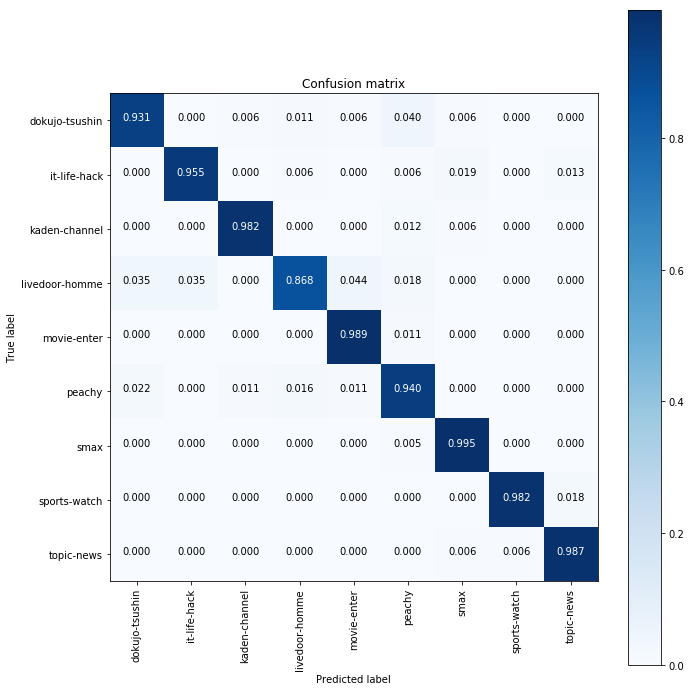

In [51]:
sys.path.append("../../..")
from plot_graph import plot_confusion_matrix
%matplotlib inline
from pylab import rcParams

rcParams["figure.figsize"] = 10, 10

conf_mat = confusion_matrix(test_df['label'], test_df['predict'])
plot_confusion_matrix(conf_mat, label_list, normalize=True)

In [48]:
sum = 0


cal_list = [163,0,1,2,1,7,1,0,0]

for num in cal_list:
    
    sum += num
    
sum

175